<img src = 'OTHER RESOURCES/Header.png' width="100%"  align="left">

<h1>
    <p style ="font-size:24pt;font-family:UCL-SoM-Solid; color:#1CE48C;"> GROUP COURSEWORK <p </u> 
</h1>

<div class="image">

<h4>
          <p style="font-size:18pt;font-family:UCL-SoM-Solid; color:#1CE48C;"> MSIN0097 Predictive Analytics</p>
          <p style="font-size:18pt;font-family:UCL-SoM-Solid; color:#213E68;">Student Names: <u> Anina Carstens, Moritz Kittler, Shuo Zang </u>  </p> 
          <p style="font-size:18pt;font-family:UCL-SoM-Solid; color:#213E68;">Student ID: <u>19140664, 19069945, 19058988</u> </p> 
          <p style="font-size:18pt;font-family:UCL-SoM-Solid; color:#213E68;">Email: <u> anina.carstens.19@ucl.ac.uk, moritz.kittler.19@ucl.ac.uk, shuo.zang.19@ucl.ac.uk </u> </p> 

</h4>

</div>

<br>
<br>
<br>


***

# <span style="color:#1CE48C"> WORKBOOK INITIALIZATION</span>
## 1. Load required libraries

Load initially required libraries which will cover most used functions.

In [1]:
!pip install keras

  Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)


In [2]:
!pip install spotipy --upgrade

  Using cached spotipy-2.11.1-py3-none-any.whl (18 kB)


In [3]:
import pandas as pd
import random

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sherlockml.filesystem as sfs
import random
from sklearn.model_selection import train_test_split
from IPython.display import display, Image

import keras
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import display, Image

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

#deactivate warnings
#import warnings
#warnings.filterwarnings("ignore")

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sherlockml/filesystem.py:21: UserWarning: sherlockml.filesystem has been renamed sherlockml.datasets - please update your code to use the new import location
  warnings.warn(_WARNING_MESSAGE)
Using TensorFlow backend.
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarn

In [4]:
#Import custom functions from library, named 'spotfunc'
#import spotfunc as spotfunc_v2

In [5]:
flatui = ['#1CE48C', "#213E68"]
flatui2 = ['#1CE48C', '#21556D','#21947B',"#213E68"]
#sns.palplot(sns.color_palette(flatui))

## 2. Read in Spotify dataset
Dataset containing >3mio streams on Spotify platform w/ a manifold of features for each individual stream.

In [6]:
%%time
# Read in sampled data
data = pd.read_csv('DATA/cleaned_data.csv')
print('rows:',len(data))

# Keep a copy of original data in case of changes made to dataframe
df_music = data.copy()

<string>:2: DtypeWarning: Columns (2,13) have mixed types.Specify dtype option on import or set low_memory=False.


rows: 3805499
CPU times: user 20 s, sys: 2.57 s, total: 22.5 s
Wall time: 22.5 s


## 3. Additional Datasource from Spotify API
Additional features for each stream (incl. audio features and genres) accessed via Spotify Developer API. Data was pre processed in seperate workbook (SECOND DATASOURCE_WMCS.ipynb) and is imported as csv-file here.

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [8]:
# Code that connects to the Spotify API, to be used to get the genre information for artists.
# Credentials that provide access to the Spotify API
client_id='b360f940d7b649f79b9b790e2ff2c964'
client_secret='c734f14083044192a1bb7c0210f1a6a3'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

# Create Spotify object to access API
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [9]:
%%time
# Read in sampled data
api_data = pd.read_csv('DATA/spotify_api_audio_features.csv')
print('rows:',len(api_data))

# Keep a copy of original data in case of changes made to dataframe
df_music_add = api_data.copy()

rows: 3556
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 10.4 ms


## 3. Combine Datasources
Add new features from spotify API to original dataset.

In [10]:
#add new features to main dataset: combine two main dataframes
df_music = pd.merge(df_music, df_music_add, on=['track_name'],how='outer')

----
----

# <span style="color:#1CE48C'"> DATA EXPLORATION</span>
## 1. Understanding the data

Each row in the data is a unique stream – every time a user streams a song in the Warner Music catalogue for at least 30 seconds it becomes a row in the database. Each stream counts as a ‘transaction’, the value of which is £0.0012, and accordingly, 1000 streams of a song count as a ‘sale’ (worth £1) for the artist. The dataset is comprised of listeners in Great Britain only.

Not all the columns provided are relevant to us. Lets take a look at some basic properties of the dataset, and identify the columns that are important for this study


A year’s worth of Spotify streaming data in the WMG database amounts to approximately 50 billion rows of data i.e. 50 billion streams (1.5 to 2 terabytes worth), with a total of seven years of data stored altogether (2010 till today).
For the purposes of this case study, we will be using a sample of this data. The dataset uploaded on the Faculty server is about 16GB, containing data from 2015 - 2017. Given the limits on RAM and cores, we will be taking a further sample of this data for purposes of this case study: a 10% random sample of the total dataset, saved as 'cleaned_data.csv'.

In [11]:
#show all columns of dataframe (/dataset)
df_music.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'day', 'log_time',
       'mobile', 'track_id', 'isrc', 'upc', 'artist_name', 'track_name',
       'album_name', 'customer_id', 'postal_code', 'access', 'country_code',
       'gender', 'birth_year', 'filename', 'region_code', 'referral_code',
       'partner_name', 'financial_product', 'user_product_type',
       'offline_timestamp', 'stream_length', 'stream_cached', 'stream_source',
       'stream_source_uri', 'stream_device', 'stream_os', 'track_uri',
       'track_artists', 'source', 'DateTime', 'hour', 'minute', 'week',
       'month', 'year', 'date', 'weekday', 'weekday_name', 'playlist_id',
       'playlist_name', 'danceability', 'acousticness', 'valence'],
      dtype='object')

The columns we will *focus* on for this case study are:

* Log Time – timestamp of each stream
* Artist Name(s) – some songs feature more than one artist
* Track Name
* ISRC - (Unique code identifier for that version of the song, i.e. radio edit, album version, remix etc.)
* Customer ID
* Birth Year
* Location of Customer
* Gender of Customer
* Stream Source URI – where on Spotify was the song played – unique playlist ID, an artist’s page, an album etc.

## 2. Data Features


### Descriptive Statistics .... hier noch eine bessere beschreibung finden

First, we take a look at the inculded variables in the dataset in order to get a general understanding of the data. We start by listing all included variables using. This reveals that 'cleaned_data.csv' contains 45 variables, which spread across numeric and non-numeric variables.

In [12]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805499 entries, 0 to 3805498
Data columns (total 48 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Unnamed: 0.1       int64  
 2   Unnamed: 0.1.1     object 
 3   day                int64  
 4   log_time           object 
 5   mobile             bool   
 6   track_id           object 
 7   isrc               object 
 8   upc                float64
 9   artist_name        object 
 10  track_name         object 
 11  album_name         object 
 12  customer_id        object 
 13  postal_code        object 
 14  access             object 
 15  country_code       object 
 16  gender             object 
 17  birth_year         float64
 18  filename           object 
 19  region_code        object 
 20  referral_code      float64
 21  partner_name       object 
 22  financial_product  object 
 23  user_product_type  object 
 24  offline_timestamp  float64
 25  stream_length     

While count, mean, min and max are mostly self-explanatory. The '.describe()'-function also inculdes standard deviation and different quantiles. As one can see these values only show up for numeric attributes (e.g., stream_length) not for non-numeric. Further, some interpretations are logically flawed (e.g., day). Therefore, '.describe()' allows us to assess the individual numeric values, however, is overall limited in its meaningfulness.

In [13]:
df_music.describe()

,Unnamed: 0,Unnamed: 0.1,day,upc,birth_year,referral_code,offline_timestamp,stream_length,stream_cached,source,hour,minute,week,month,year,weekday,danceability,acousticness,valence
count,3.805499e+06,3.805499e+06,3805499.0,3.805499e+06,3.795478e+06,0.0,0.0,3.805499e+06,0.0,0.0,3.805499e+06,3.805499e+06,3.805499e+06,3.805499e+06,3.805499e+06,3.805499e+06,3.083495e+06,3.083495e+06,3.083495e+06
mean,1.902749e+06,1.902750e+07,10.0,2.389062e+11,1.990107e+03,NaN,NaN,1.891587e+02,NaN,NaN,1.373665e+01,2.254671e+01,2.316008e+01,5.970407e+00,2.016437e+03,2.837800e+00,6.052237e-01,2.375802e-01,4.428670e-01
std,1.098553e+06,1.098553e+07,0.0,2.757391e+11,1.068282e+01,NaN,NaN,6.105546e+01,NaN,NaN,5.400456e+00,1.675157e+01,1.320996e+01,3.036840e+00,5.964080e-01,2.001057e+00,1.449020e-01,2.971150e-01,2.369624e-01
min,0.000000e+00,9.000000e+00,10.0,1.686134e+10,1.867000e+03,NaN,NaN,3.000000e+01,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.014000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.513745e+05,9.513754e+06,10.0,7.567991e+10,1.987000e+03,NaN,NaN,1.720000e+02,NaN,NaN,1.000000e+01,1.500000e+01,1.400000e+01,4.000000e+00,2.016000e+03,1.000000e+00,4.970000e-01,1.210000e-02,2.570000e-01
50%,1.902749e+06,1.902750e+07,10.0,1.902958e+11,1.993000e+03,NaN,NaN,2.000000e+02,NaN,NaN,1.400000e+01,3.000000e+01,2.300000e+01,6.000000e+00,2.016000e+03,3.000000e+00,6.200000e-01,8.120000e-02,4.400000e-01
75%,2.854124e+06,2.854124e+07,10.0,1.902960e+11,1.997000e+03,NaN,NaN,2.240000e+02,NaN,NaN,1.800000e+01,4.500000e+01,3.200000e+01,8.000000e+00,2.017000e+03,5.000000e+00,7.180000e-01,4.760000e-01,5.990000e-01
max,3.805498e+06,3.805499e+07,10.0,5.414940e+12,2.017000e+03,NaN,NaN,9.000000e+02,NaN,NaN,2.300000e+01,4.500000e+01,5.000000e+01,1.200000e+01,2.017000e+03,6.000000e+00,9.600000e-01,9.960000e-01,9.830000e-01


Let's continue by taking an extract out of the actual dataset leveraging '.head()'. This allows us to take a first loo into the different data formats and information contained in the data cells. Each row represents one unique stream. As we will see in the next step there are a total of 3.805.499 streams included in the given dataset.

In [14]:
df_music.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,...,month,year,date,weekday,weekday_name,playlist_id,playlist_name,danceability,acousticness,valence
0,0,9,"('small_artists_2016.csv', 9)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,5,2016,2016-05-10,1,Tuesday,NaN,NaN,0.333,0.00198,0.607
1,1,19,"('small_artists_2016.csv', 19)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,5,2016,2016-05-10,1,Tuesday,NaN,NaN,0.333,0.00198,0.607
2,2,29,"('small_artists_2016.csv', 29)",10,20160510T14:00:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,...,5,2016,2016-05-10,1,Tuesday,NaN,NaN,0.333,0.00198,0.607


## 3. EXPLORATORY ANALYSIS

We continue to analyize patterns, that highlight on any potential uncertainties or peculiarities using figures, plots and visualization as necessar. Our approach is to look at one attribute at a time. Be aware there is a lot to learn.

### Histograms

The Histograms provide a great deal of information. We will continue by discussing a some key insights from these.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


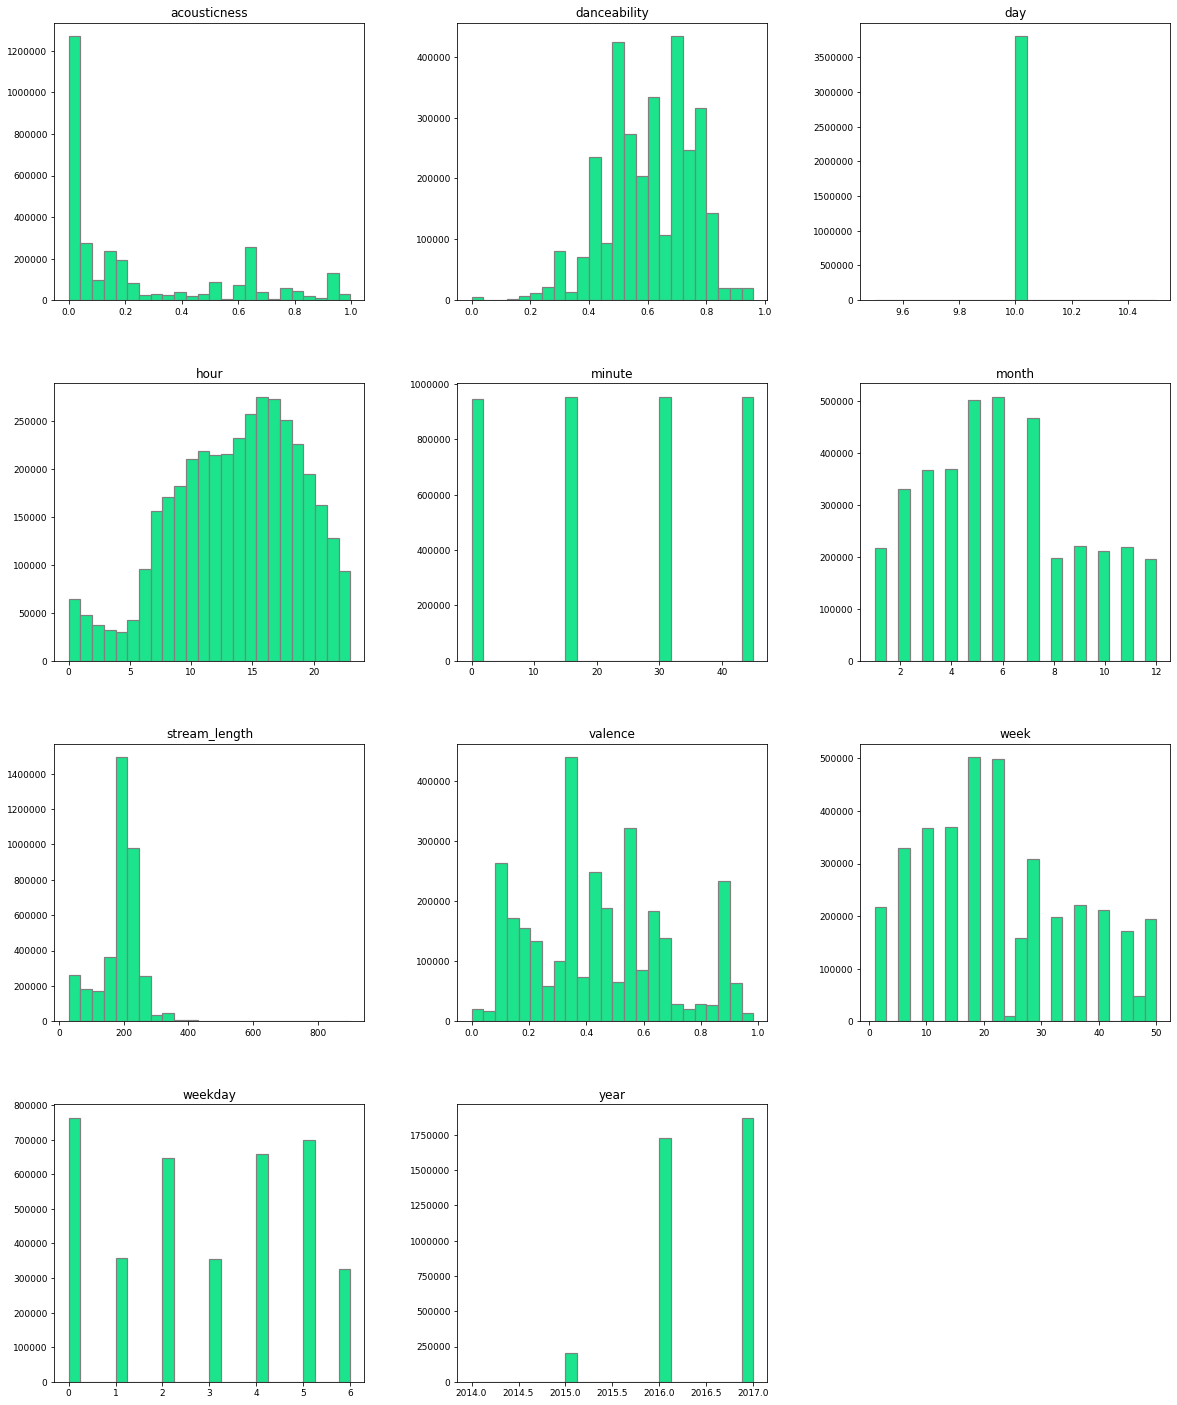

In [15]:
#histogram for all non-objects
df_histo = df_music

#dropped all non-numeric / logically flawed variables
df_histo = df_histo.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','log_time','mobile','track_id','isrc',
                          'track_name','album_name','customer_id','postal_code','access','country_code',
                          'gender','birth_year','filename','region_code','referral_code','partner_name',
                          'financial_product','user_product_type','stream_source','stream_source_uri',
                          'stream_device','stream_os','track_uri','track_artists','DateTime','date',
                          'weekday_name','playlist_id','playlist_name','offline_timestamp','source',
                          'stream_cached','upc','artist_name'], axis=1)

df_histo = df_histo.hist(figsize=(20, 25), bins=24, xlabelsize=9, ylabelsize=9, color = '#1CE48C', 
                         grid=False , edgecolor='grey', linewidth=1.2),plt.tight_layout(rect=(0, 1, 1, 0))

Description - to be changed at given time:
- Day: It appears that the dataset only contains one single value for day (=10). Further exploration will follow.
- Hour: One can notice that over the 24h timespan of given days the number of plays differ drastically. While some users listen at any given time, the steep increase in plays starts after 5am and then continues throughout the day. Between 4-5pm Spotify reaches its maximum plays which then decrease again over the evening and eventually end up at the 5am starting point again. We will explore this in detail later on.
- weekday: Intersting to notice is the distribution of streams across weekdays. One could assume that the weekends tend to have the most streams. As it appears users stream a lot on fridays and saturdays, the most streamed days is monday. Additioanlly, Wednesday has alot of plays (names gathered from weekday_name). Since this to me looks unintuitive, we will take a closer look at weekdays.
- month/week: Further, there appears to be an interesting trend involving the streaming time over the year. The late spring / early summer month have the most streams. This trend is also visiable when looking at the weeks (Note: some weeks appear to be missing). Again, the summer time indicates the most plays while the winter time has a steady yet low number of plays. This is visualized and discussed later on.
- year: When looking at the 'year' one first notices that there is data for 2015, 2016 and 2017. While there is a massive increase in streams between 2015 and 2016, the increase in the following year is only marginal.
- stream length: Stream length which appears to be measured in seconds has a high at ~200sec. Which seems logical since songs tend to last around 3-4minutes. Further there are large number of streams with less than 200sec, these could be skipped/half-played songs. On the other, the long-tail is reasonably short since few songs last very long.

### Variable Exploration

Will take a closer look at the following variable.
1. Log Time
2. Gender
3. Artists
4. Track Name
5. Stream Length
6. User Age
7. Geograpical Data 
8. Stream Source
9. Playlists

----

<div class="alert alert-success">
<p>

(1) Log Time
    --
    
Variable Exploration
</p> 

</div>

<div class="alert alert-success">
<p>
    
*Description:* We noticed that there is a dedicated variable for log time (i.e.,'log_time') during the general data understanding. We also noted that there are multiple time-relevant variables (e.g., 'DateTime'). Therefore, we start by looking at a sample output for log times.

</p> 

</div>

In [16]:
#attribute overview
df_music['log_time'].head(3)

0    20160510T12:15:00
1    20160510T12:15:00
2    20160510T14:00:00
Name: log_time, dtype: object

In [17]:
#attribute(s) overview
df_music[['log_time', 'DateTime', 'hour', 'minute','week','month','date','weekday','weekday_name']].head(3)

,log_time,DateTime,hour,minute,week,month,date,weekday,weekday_name
0,20160510T12:15:00,2016-05-10 12:15:00,12,15,19,5,2016-05-10,1,Tuesday
1,20160510T12:15:00,2016-05-10 12:15:00,12,15,19,5,2016-05-10,1,Tuesday
2,20160510T14:00:00,2016-05-10 14:00:00,14,0,19,5,2016-05-10,1,Tuesday


In [18]:
#unique values for time relevant attributes
df_music[['log_time','DateTime','hour','minute','week','month','date'
          ,'weekday','weekday_name','year']].nunique()

log_time        3257
DateTime        3257
hour              24
minute             4
week              22
month             12
date              38
weekday            7
weekday_name       7
year               4
dtype: int64

<div class="alert alert-success">
<p>
    
*Insight:* Comparing these attributes one quickly notices that all attributes refer to the same timestamp. All of them are sub-values of 'log_time' which combines them. Additionally, it is interesting that certain attributes are less frequent than expected. For example 'date', the dataset only contains 38 unique dates over the time horizon of 4 years. The same can be seen for 'week' which only records 22 unique weeks (see below). Hence, we are missing crucial data in order to get a complete picture.
    
</p> 

</div>

In [19]:
#look at all dates contained in the dataset
df_music['date'].value_counts()

2017-05-10    349052
2017-06-10    328465
2017-07-10    298310
2017-04-10    260368
2017-03-10    252229
2017-02-10    220711
2016-09-10    196641
2016-10-10    184916
2016-08-10    178459
2016-11-10    171150
2016-06-10    170708
2017-01-10    162609
2016-07-10    158154
2016-12-10    146615
2016-05-10    142871
2016-03-10    111453
2016-02-10    108856
2016-04-10    103670
2016-01-10     53867
2015-12-10     48013
2015-11-10     47232
2015-10-10     25879
2015-09-10     23622
2015-08-10     20139
2015-07-10     10992
2015-05-10     10694
2015-06-10      9487
2015-04-10      4917
2015-03-10      3417
2014-12-10       687
2015-02-10       550
2015-01-10       351
2014-11-10       220
2014-06-10        86
2014-10-10        40
2014-07-10        30
2014-09-10        23
2014-08-10        16
Name: date, dtype: int64

<div class="alert alert-success">
<p>
    
The detailed look at 'date' answers the question raised when looking at the histograms. The datapoints contained in the dataset have only been collected once a month (always on the 10th). One can still observe a strong increase of streams from the first to the last datapoint.
<br>
<br>
As we've seen in the histogram, weekly streams vary quite a low and peak during the summer month. In general, winter and spring tend to have less streams. Since we're missing substantial amount of weeks we, however, shouldn't not draw final conclusions only based on 'week'. 
    
</p> 

</div>

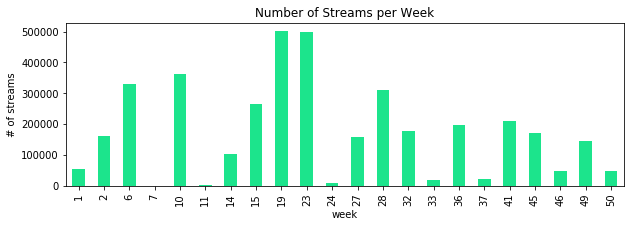

In [20]:
#bar chart number of streams per week; indicates missing weeks
ax = df_music.groupby('week').size().plot(kind='bar',figsize=(10,3),title="Number of Streams per Week", color='#1CE48C')
ax.set_ylabel("# of streams")
plt.show()

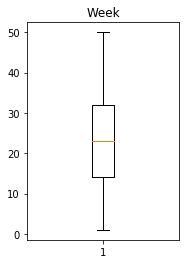

In [21]:
#boxplot week (yearly basis)
fig = plt.figure()
ax1 = fig.add_subplot(121)

ax1.boxplot(df_music.week)

ax1.set_title('Week')
plt.show()

<div class="alert alert-success">
<p>
    
As seen when looking at the histograms, we notice a daily peak for streams. User tend to listen to music in the evening hours (e.g., after work or school). We continue by looking at this on a weekday basis.
</p> 

</div>

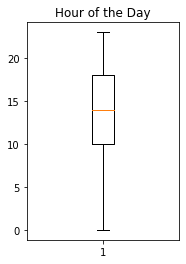

In [22]:
#boxplot number of streams at given daytime (hour)
fig = plt.figure()
ax1 = fig.add_subplot(121)

ax1.boxplot(df_music.hour)

ax1.set_title('Hour of the Day')
plt.show()

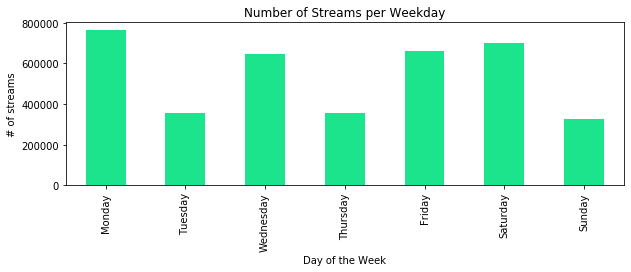

In [23]:
#bar chart number of streams per weekday
ax = df_music.groupby('weekday').size().plot(kind='bar',figsize=(10,3),title="Number of Streams per Weekday", color='#1CE48C')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday',"Thursday", "Friday","Saturday", "Sunday"])
ax.set_ylabel("# of streams")
plt.xlabel('Day of the Week')
plt.show()

In [24]:
df_music.weekday.value_counts(sort=False)

0    763953
1    356765
2    646564
3    354268
4    659597
5    697951
6    326401
Name: weekday, dtype: int64

<div class="alert alert-success">
<p>

As previously outlined, there are major differences in number of streams per weekday. In absolute numbers (measured in streams) tuesdays, thursdays and sundays have comparably less streams. However, when counting the number of weekdays included in the dataset it becomes evident that these days are less frequently represented. Since data was only collected on the 10th of each month, some weekdays may be underrepresented.
<br>
<br>
Now, we continue by looking at the yearly basis again.
</p> 

</div>

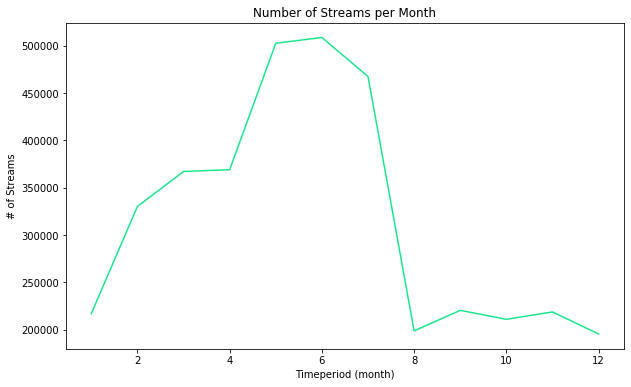

In [25]:
#bar chart streams monthly (one year)
df_music.groupby('month').size().plot(kind='line',figsize=(10,6),title="Number of Streams per Month", color='#1CE48C')
plt.ylabel("# of Streams")
plt.xlabel('Timeperiod (month)')
plt.show()

<div class="alert alert-success">
<p>
    
It is apparent that users stream more songs out of our dataset in the late spring/ early summer month. One explanation for this is that people tend to spend more time outside and listen to music as well as the so called 'spring-mood' which could motivate people to listen to more music. This follows the same trend we've seen when looking at streams per week.
</p> 

</div>

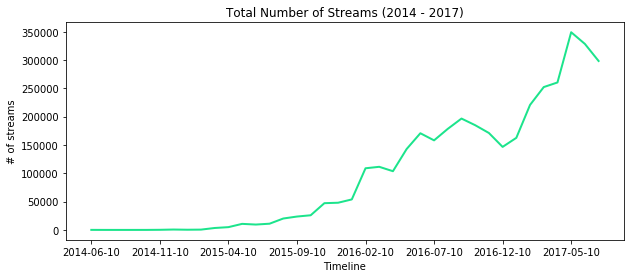

In [26]:
#line chart streams over long time-period
ax = df_music.groupby('date')['customer_id'].size().plot(kind='line', figsize=(10,4), title='Total Number of Streams (2014 - 2017)',  linewidth=2, color='#1CE48C')
ax.set_xlabel('Timeline')
ax.set_ylabel('# of streams')
plt.show()

<div class="alert alert-success">
<p>
    
The same trend is evident when looking at a longer time horizon. While there is a increase in streams over time one still notices the spikes during the summer month.
</p> 

</div>

----

<div class="alert alert-success">
<p>

(2) Gender
    --
    
Variable Exploration
</p> 

</div>

As seen in the initial data review, the Spotify data also allows us to gain insights into gender of its customers. 

In [27]:
#rename female/male into numeric binary
df_music['gender'] = df_music['gender'].apply({'male':0, 'female':1}.get)

#map the binary value of mode to major/minor
gender_mapping = {1.0: "female", 0.0: "male"}
df_music['gender'] = df_music['gender'].map(gender_mapping)

In [28]:
gender_mapping

{1.0: 'female', 0.0: 'male'}

In [29]:
#user age 


#important for later on

df_music['user_age'] = df_music['year'] - df_music['birth_year']
###

In [30]:
count_female = int(df_music[df_music['gender']=='female'].groupby(['gender'])['gender'].count())
count_male = int(df_music[df_music['gender']=='male'].groupby(['gender'])['gender'].count())

female_quote = round(((count_female/(count_female+count_male))*100),2)
male_quote = round(((count_male/(count_female+count_male))*100),2)

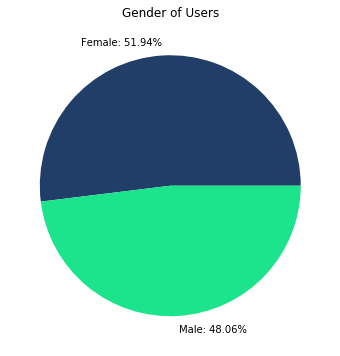

In [31]:
df_music.groupby('gender').size().plot(kind='pie',figsize=(10,6),title="Gender of Users",
                                       labels=['Female: {}%'.format(female_quote),'Male: {}%'.format(male_quote)],
                                       colors =[ "#213E68", '#1CE48C'])
plt.xlabel(None)
plt.ylabel(None)
plt.show()

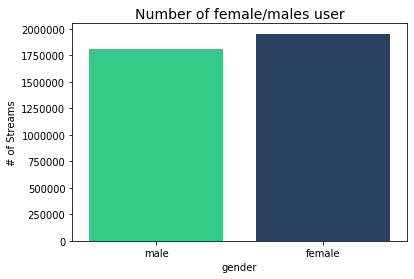

In [32]:
#rename female/male into numeric binary
df_music['gender'] = df_music['gender'].apply({'male':0, 'female':1}.get)

#map the binary value of mode to major/minor
gender_mapping = {1.0: "female", 0.0: "male"}
df_music['gender'] = df_music['gender'].map(gender_mapping)

#draw a countplot of the values
sns.countplot(x ='gender', data=df_music, palette=flatui)
plt.title("Number of female/males user", size=14)
plt.ylabel("# of Streams")
plt.show()

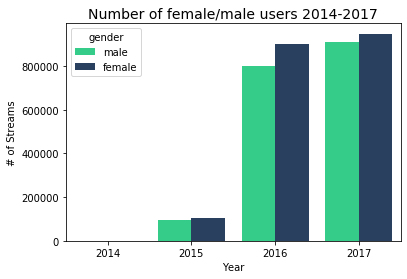

In [33]:
sns.countplot(x="year", hue="gender", data=df_music,palette=['#1CE48C',"#213E68"])
plt.title("Number of female/male users 2014-2017", size=14)
plt.xlabel("Year")
plt.ylabel("# of Streams")
plt.show()

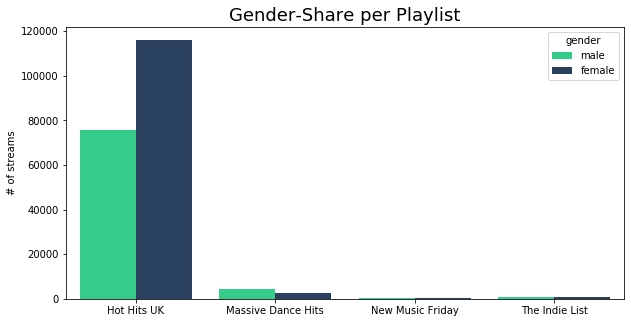

In [34]:
#generate dataframe focused on our four playlist; used again later on
df_playlist = df_music[(df_music['playlist_name']=='Hot Hits UK')|(df_music['playlist_name']=='Massive Dance Hits')|(df_music['playlist_name']=='The Indie List')|(df_music['playlist_name']=='New Music Friday')]

#catplot gender share at individual playlists
a4_dims = (10,5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.countplot(x="playlist_name", hue="gender",data=df_playlist, palette=flatui)
ax.set_title("Gender-Share per Playlist", size=18)
ax.set(xlabel=None, ylabel="# of streams")
plt.show()

<div class="alert alert-success">
<p>

When adding playlists as a additional dimension, the gender share appears to change. Notable is that 'Hot Hits UK' is mostly streamed by females while 'Massive Dance Hits' is more often streamed by males. Further analysis in the music taste and artist selection of both genders might be useful in the future.
</p> 

</div>

In [35]:
df_geo = df_music[df_music['country_code'] == 'GB'] #.columns

In [36]:
df_geo = df_geo[df_geo['year'] == 2017]

In [37]:
df_geo.shape

(1871744, 49)

In [38]:
###################################################################################################

In [39]:
#alle groß schreiben
df_music['track_artists'] = df_music['track_artists'].str.upper()
df_music['artist_name'] = df_music['artist_name'].str.upper()

In [40]:
df_music[['artist_name','track_artists']]

,artist_name,track_artists
0,STURGILL SIMPSON,STURGILL SIMPSON
1,STURGILL SIMPSON,STURGILL SIMPSON
2,STURGILL SIMPSON,STURGILL SIMPSON
3,STURGILL SIMPSON,STURGILL SIMPSON
4,STURGILL SIMPSON,STURGILL SIMPSON
...,...,...
3805494,ANNE-MARIE,ANNE-MARIE
3805495,ANNE-MARIE,ANNE-MARIE
3805496,ANNE-MARIE,ANNE-MARIE
3805497,ANNE-MARIE,ANNE-MARIE


In [41]:
df_music['buffer'] = 1
df_music['new'] = df_music['buffer'][(df_music['artist_name'] == df_music['track_artists'])]
1- df_music['new'].sum()/df_music['artist_name'].count()

0.1075540947455248

In [42]:
###################################################################################################

----

<div class="alert alert-success">
<p>

(3) Artists
    --
    
Variable Exploration
</p> 

</div>

In [43]:
#attribute overview
df_music['artist_name'].head(3)

0    STURGILL SIMPSON
1    STURGILL SIMPSON
2    STURGILL SIMPSON
Name: artist_name, dtype: object

In [44]:
#generate categorial variables
df_music['artist_code']=df_music['track_artists'].factorize()[0]

In [45]:
print('Number of unique artists in training set: ',len(df_music['artist_code'].value_counts()))

Number of unique artists in training set:  818


<div class="alert alert-success">
<p>

When analyzing the number of streams per artist, we noticed that the 'power law' is present. Few artists have a lot of streams while the long-tail of artists has very little number of streams. Therefore, we continued to explore the most popular artists (top 5).
</p> 

</div>

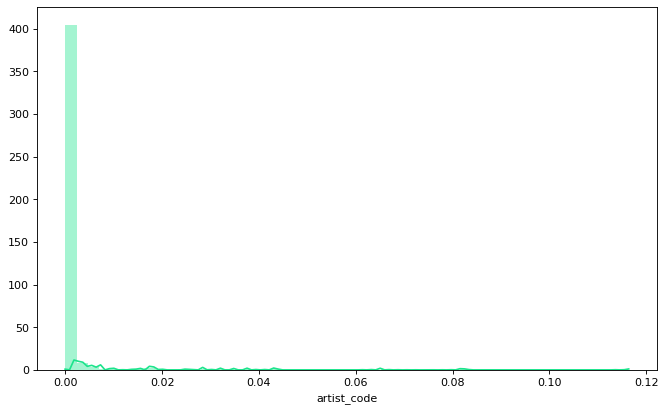

In [46]:
fig = plt.figure(figsize=(10,6),dpi=80)
fig = sns.distplot(df_music['artist_code'].value_counts(normalize=True),color='#1CE48C')

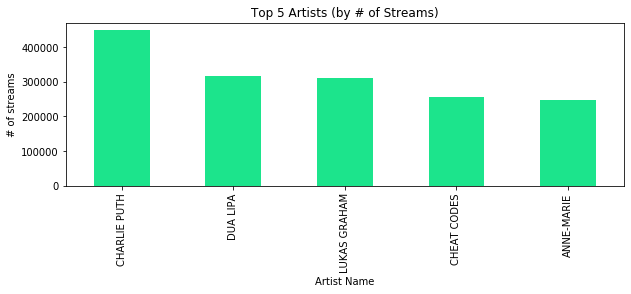

In [47]:
#bar chart most popular artists
ax = df_music.groupby('artist_name').size().nlargest(5).plot(kind='bar',figsize=(10,3),color='#1CE48C',fontsize=10, title='Top 5 Artists (by # of Streams)')
ax.set_ylabel("# of streams")
ax.set_xlabel("Artist Name")
plt.show()

<div class="alert alert-success">
<p>

Especially when comparing the top 5 most streamed artists with the lowest 5 streamed artists you clearly see the difference. While 'Charlie Puth' has over 400.000 plays, the bottom five artists only have 1 stream each. Since this is commen when comparing top to bottom, we will now look at the magnitude in difference.
</p> 

</div>

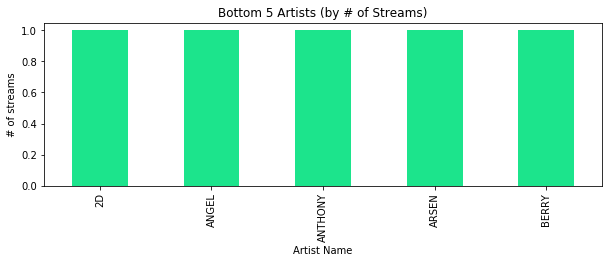

In [48]:
#bar chart bottom artists
ax = df_music.groupby('artist_name').size().nsmallest(5).plot(kind='bar',figsize=(10,3),color='#1CE48C',fontsize=10, title='Bottom 5 Artists (by # of Streams)')
ax.set_ylabel("# of streams", rotation=90)
ax.set_xlabel("Artist Name")
plt.show()

<div class="alert alert-success">
<p>

To visualise the magnitude of the difference between the few highly streamed artist and all others we applied a threshold to the top-artist graph. As seen below, 6 out of >800 artists (Charlie Puth, Dua Lipa, ...) are associated with nearly half of all streams. This underlines the beforementioned long-tail of artists in our dataset.
</p> 

</div>

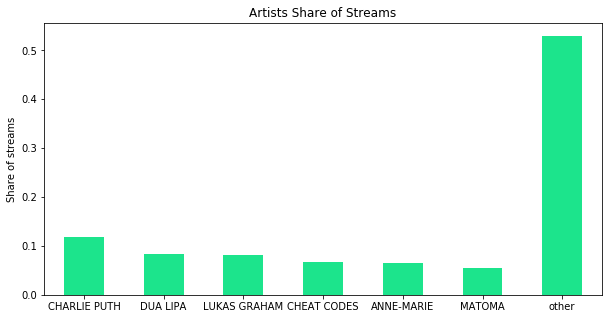

In [49]:
#graph artists according to %-streams (w/threshold)
prob = df_music['artist_name'].value_counts(normalize=True)

#set threshold
threshold = 0.05

#mask threshold
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob

#plot graph
prob.plot(kind='bar', color=["#1CE48C"], figsize=(10,5))
plt.xticks(rotation=0)
plt.title('Artists Share of Streams')
plt.ylabel("Share of streams")
plt.show()

<div class="alert alert-success">
<p>

(4) Track Name
    --
    
Variable Exploration
</p> 

</div>

In [50]:
#attribute(s) overview
df_music[['track_name','track_id']].head(3)

,track_name,track_id
0,Call To Arms,8f1924eab3804f308427c31d925c1b3f
1,Call To Arms,8f1924eab3804f308427c31d925c1b3f
2,Call To Arms,8f1924eab3804f308427c31d925c1b3f


<div class="alert alert-success">
<p>

The same trend as for artists is present again, few songs are streamed frequently and most songs only a few times. Hence, we just took a look at the top 10 songs. We observe that '7 years' by Lukas Graham is the most streamed song out of our dataset. 
</p> 

</div>

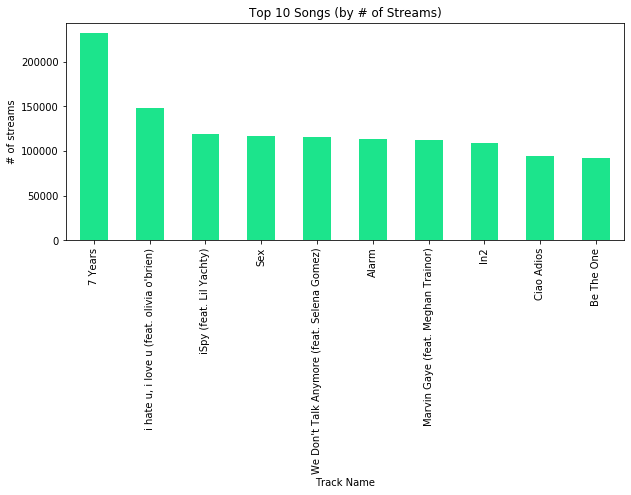

In [51]:
#bar chart top 10 songs
ax = df_music.groupby('track_name').size().nlargest(10).plot(kind='bar',figsize=(10,4),color='#1CE48C',fontsize=10, title='Top 10 Songs (by # of Streams)')
ax.set_ylabel("# of streams")
ax.set_xlabel("Track Name")
plt.show()

In [52]:
#graphic top song in dataset
#display(Image(filename='./graphics/7 years_image.png', width=200, height=40))

<div class="alert alert-success">
<p>

Tracks follow a similar distribution as artists before. A couple of tracks (i.e., 8 tracks) cover nearly 30% of all streams. Logically, artists are even more central than tracks. In other words, artists produce a number of songs therefore one single song is less likely to account for a share of the total tracks. However, even for tracks there is the notion that the long-tail of tracks is only played few times.
</p> 

</div>

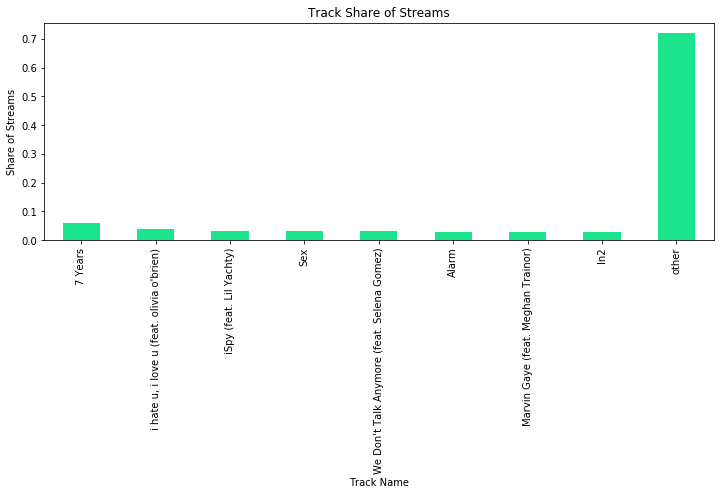

In [53]:
#graph tracks according to %-streams (w/threshold)
prob = df_music['track_name'].value_counts(normalize=True)

#set threshold
threshold = 0.025

#mask threshold
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob

#plot graph
prob.plot(kind='bar', color=["#1CE48C"],figsize=(12,4))
plt.xticks(rotation=90)
plt.title('Track Share of Streams')
plt.xlabel("Track Name")
plt.ylabel("Share of Streams")
plt.show()

<div class="alert alert-warning">
<b>ACTION: Interpretation is missing </b> 


</div>

<div class="alert alert-success">
<p>

(5) Stream Length
    --
    
Variable Exploration
</p> 

</div>

In [54]:
#attribute overview
df_music['stream_length'].head(3)

0    277.0
1     53.0
2    326.0
Name: stream_length, dtype: float64

In [55]:
print('Average Stream Length: ',df_music['stream_length'].mean())

Average Stream Length:  189.15867853335396


<div class="alert alert-success">
<p>

As the mean stream length suggested the distribution peaks at around 200 seconds. This can be explained with the common song length of 3-4minutes. Further, on can observe that only few users stop the stream after they have crossed 30sec (min. to be recorded). As well as only few datapoints having a stream length >300 since only a couple of songs last that long.
</p> 

</div>

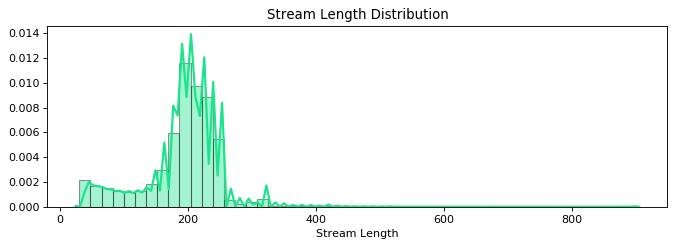

In [56]:
fig = plt.figure(figsize=(10,3), dpi=80)
fig = sns.distplot(df_music['stream_length'],color='#1CE48C', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})
fig.set_title('Stream Length Distribution')
fig.set(xlabel='Stream Length')
plt.show()

<div class="alert alert-success">
<p>

There appears to be a long-tail of users streaming less songs while some users tend to stream a lot. This is even more evident when looking at 'powerusers' (see below) and the average number of streams per user. While some users stream above 100 tracks the average for the training data is close to 1.68 tracks.
<br>
<br>
The total number of streams as well as the avg. streams per user seems rather small. As mentioned before, the datapoints are collected over 38 dates. Hence, it only provides partial picture of the total user-activity.
</p> 

</div>

In [57]:
#calculation average # of streams per user
df_music['customer_id']=df_music['customer_id'].factorize()[0]
print('Average number of streamed songs: ',df_music['customer_id'].value_counts().mean())

Average number of streamed songs:  1.8198168084072641


<div class="alert alert-success">
<p>

*Insights:* There are certain 'power-users' within our data. These are users who frequently stream songs, accumulating as amany as 140 streams during the sampled time period compared to the baseline of 1.8 streams/user.

</p> 

</div>

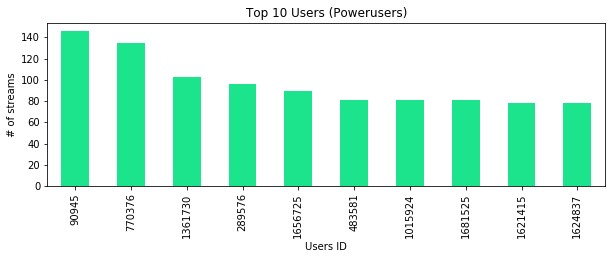

In [58]:
#bar chart top 10 users (poweruser)
ax = df_music.groupby('customer_id').size().nlargest(10).plot(kind='bar',figsize=(10,3),color='#1CE48C',fontsize=10, title='Top 10 Users (Powerusers)')
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(True)
ax.set_ylabel("# of streams")
ax.set_xlabel("Users ID")
plt.show()

<div class="alert alert-success">
<p>

(6) User Age
    --
    
Variable Exploration
</p> 

</div>

In [59]:
#function to get use of device per age group
def age_device_breakdown(data):
    #again, define actual age using 'year' and 'birth-year'
    data['age'] = round(data['year'] - data['birth_year'], 0)
    
    #add 'age_bin' column to the dataframe with labels for each bin
    data["age_bin"] = pd.cut(x=data["age"], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000],
                             labels=['<20','20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '>100'])
    
    #generate the output by creating a matrix
    result = pd.DataFrame(pd.crosstab(data['stream_device'],data['age_bin']).apply(lambda r: (r/r.sum())*100, axis=0))
    
    return result #data

In [60]:
#apply function
age_device_breakdown(df_music)

age_bin,<20,20s,30s,40s,50s,60s,70s,80s,90s,>100
stream_device,,,,,,,,,,
desktop,19.084715,22.708768,27.103755,27.617323,28.998460,34.417829,32.967464,24.326599,26.867749,29.094013
mobile,69.299265,69.863530,62.495526,59.589458,57.223863,46.919373,46.569973,52.356902,60.556845,59.248872
tablet,11.616020,7.427702,10.400719,12.793219,13.777677,18.662798,20.462564,23.316498,12.575406,11.657115


<div class="alert alert-success">
<p>


*Insight:* Usage of devices differs between age groups as one would expect. The younger generation tends to stream most via mobile and tablet, while the desktop regains significance with older people.

</p> 

</div>

<div class="alert alert-success">
<p>


*Explanation:* The year of birth provides great value for our further analysis. Especially when thinking about targeting users with the right music. It is widely assumed that music taste follows the age, therefore, we need to consider this factor during our playlist analysis.
<br>
<br>
Note that we decided to cut the birth year in 2003 since Spotify regulations does not allow users younger than 14 years old (latest datapoint in 2017).



</p> 

</div>

In [61]:
#attribute overview
df_music['birth_year'].head(3)

0    1968.0
1    1968.0
2    1995.0
Name: birth_year, dtype: float64

In [62]:
print('Average birth year: ',round(df_music['birth_year'].mean(),0))

Average birth year:  1990.0


In [63]:
#cut allowed birth age (sperate dataframe to keep datapoints for other attributes)
df_birthyear = df_music[df_music['birth_year'] <= 2003]

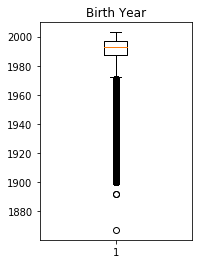

In [64]:
#boxplot bithyear
fig = plt.figure()
ax = fig.add_subplot(121)

ax.boxplot(df_birthyear.birth_year)

ax.set_title('Birth Year')
plt.show()

<div class="alert alert-success">
<p>

One can directly notice that the large focus group of users appaer to be born around 1990. This seems logical considering that Spotify is a trendy tech-product targted to young people.
<br>
<br>
Additionally, one has to note that there a large amounts of outliers dating back even before 1880. This is obviously unrealistic and leads to the assumption that users may have entered fake ages. Therefore for further analysis we decided to assume that the maximum birth year within in the analysis (playlist targeted to young people) is set to 1947 (70 years old at max).
</p> 

</div>

In [65]:
#cut birth age according to outliers
df_birthyear = df_music[df_music['birth_year'] >= 1947]

<div class="alert alert-success">
<p>

*Description:* Next, we take a closer look at the actual number of streams included at given birth years. The same trend as before becomes evident: The large mass of users are born between 1990 and 2000. In more detail, there is a spike in users in 1990 and again in the years between 1995 - 1998. Since nearly all age-groups use Spotify, the long-tail of users is the older generation. And, based on the age restrictions set beforehand there are no observations after 2003/ before 1947.
</p> 

</div>

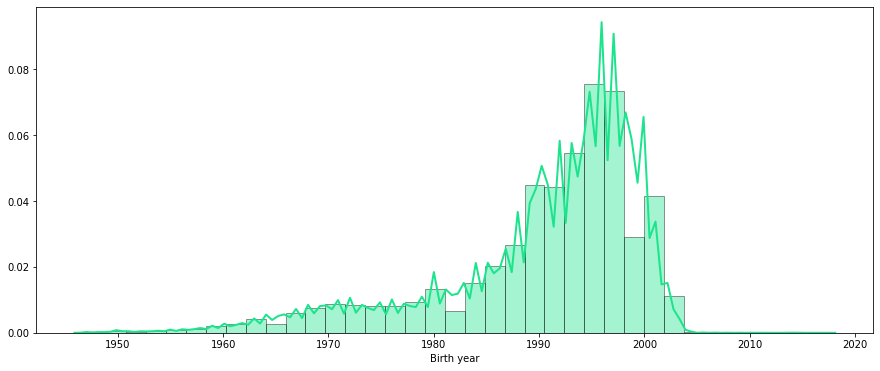

In [66]:
#plot distribution of observations
plt.figure(figsize=(15, 6))
sns.distplot(df_birthyear['birth_year'], hist=True, kde=True, bins=int(150/4), color = '#1CE48C', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})
plt.xlabel("Birth year")
plt.show()

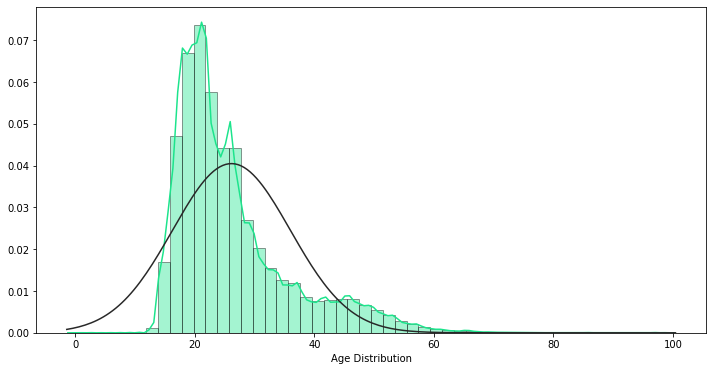

In [67]:
# Age Distribution
def get_age(df):
    df.birth_year = np.float64(df.birth_year)
    df = df.dropna(subset = ['birth_year'])
    #df = df[(df.birth_year!='male') & (df.birth_year!='female')]
    age = df.year - df.birth_year
    return age
all_artists_age = get_age(df_music)
all_artists_age_cleaned= pd.Series(all_artists_age[all_artists_age<100],name="Age Distribution")
plt.figure(figsize=(12,6))
from scipy.stats import norm
sns.distplot(all_artists_age_cleaned,fit=norm, color="#1CE48C",hist_kws={'edgecolor':'black'})
plt.show()

<div class="alert alert-success">
<p>

*Insights:* Interstingly the normalized age distribution peaks just before 'age == 30', while the spike in age groups appears to be much earlier (close to age == 20). This can be explained with the long-tail of users ranging into age groups >100.
    
</p> 

</div>

In [68]:
#generate dataframe focused on our four playlist; used again later on
df_playlist = df_music[(df_music['playlist_name']=='Hot Hits UK')|(df_music['playlist_name']=='Massive Dance Hits')|(df_music['playlist_name']=='The Indie List')|(df_music['playlist_name']=='New Music Friday')]

<div class="alert alert-success">
<p>

*Insights:* Comparing the playlists with age reveals that 'Hot Hits UK' is popular across all ages groups, 'New Music Friday' is mostly listend to by younger audience and 'Massive Dance Hits' and 'The Indie List' have a young audience yet also older people listening to these songs. Considering the content of the individual playlists this distribution seems reasonable. However, note that due to the unbalance between streams in all four playlists this might not hold true for a larger population.
</p> 

</div>

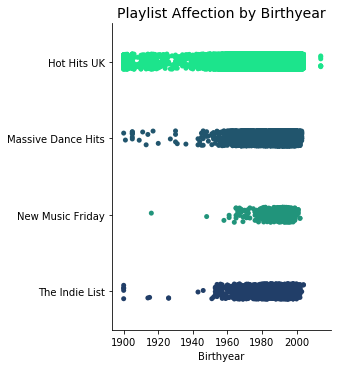

In [69]:
#catplot birthyear and playlist streams

fig = sns.catplot(x="birth_year",y="playlist_name",data=df_playlist, palette=flatui2)
plt.title('Playlist Affection by Birthyear', size=14)
plt.xlabel('Birthyear')
plt.ylabel(None)
plt.show()

<div class="alert alert-success">
<p>

(7) Geograpical Data 
    --
    
Variable Exploration
</p> 

</div>

<div class="alert alert-success">
<p>
 
*Explanation:* The provided information tells us that all streams occured in the UK. Hence, we can focus on a narrow customer location. First, we verify this information by looking at the 'country_code' provided before we look at a sample location output to better understand the provided data.



</p> 

</div>

In [70]:
#share of UK users
print(df_music.country_code[df_music['country_code'] == 'GB'].count()/df_music['country_code'].count()*100, '%')

100.0 %


In [71]:
#attribute(s) overview
df_music[['country_code','postal_code','region_code']].head(3)

,country_code,postal_code,region_code
0,GB,NE,GB-DUR
1,GB,NE,GB-DUR
2,GB,1,GB-ESS


<div class="alert alert-success">
<p>

*Insights:* One can observe that 'GB-LDN' is the region with the most streams by far. LDN represents London, which seems only logical that London would have the most streams. London is followed by 'GB-BIR'(Birmingham) and 'GB-MAN' (Manchester), which are the 2nd and 3rd largest cities in GB.
<br> <br>     
London – 9,750,500.
    <br> 
Birmingham – 2,453,700.
    <br> 
Manchester – 1,903,100.
 

Source: https://www.citymetric.com/skylines/where-are-largest-cities-britain-1404
</p> 

</div>

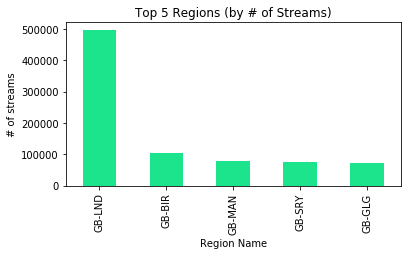

In [72]:
#bar chart top 5 regions (by # of streams)
ax = df_music.groupby('region_code').size().nlargest(5).plot(kind='bar',figsize=(6,3),color='#1CE48C',fontsize=10, title='Top 5 Regions (by # of Streams)')
ax.set_ylabel("# of streams")
ax.set_xlabel("Region Name")
plt.show()

<div class="alert alert-success">
<p>

Lastly, we leveraged Tableau in order to generate a map pin-pointing the locations. As noted before, this gives a visual representation of the trend. London appears to be the city with the most streams by far, followed by other mayor GB cities. Since Spotify targets young cosmopolitan customers they are heavily centered in larger metropolitan areas. Interesting to see is 'Glasgow' (up north) since it is in Scottland, which however is still part of GB.
</p> 

</div>

In [73]:
df_music.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'day', 'log_time',
       'mobile', 'track_id', 'isrc', 'upc', 'artist_name', 'track_name',
       'album_name', 'customer_id', 'postal_code', 'access', 'country_code',
       'gender', 'birth_year', 'filename', 'region_code', 'referral_code',
       'partner_name', 'financial_product', 'user_product_type',
       'offline_timestamp', 'stream_length', 'stream_cached', 'stream_source',
       'stream_source_uri', 'stream_device', 'stream_os', 'track_uri',
       'track_artists', 'source', 'DateTime', 'hour', 'minute', 'week',
       'month', 'year', 'date', 'weekday', 'weekday_name', 'playlist_id',
       'playlist_name', 'danceability', 'acousticness', 'valence', 'user_age',
       'buffer', 'new', 'artist_code', 'age', 'age_bin'],
      dtype='object')

In [74]:
#grwoth in streams in top 5 UK regions (2015-2016); since these are the only 'full' recorded years

#streams in either 2015 and 2017
df_2015 = pd.DataFrame(df_music[df_music['year']==2015].groupby('region_code').size().nlargest(5),columns=['2015'])
df_2016 = pd.DataFrame(df_music[df_music['year']==2016].groupby('region_code').size().nlargest(5),columns=['2016'])

#dataframe creation
df_location = pd.concat([df_2015, df_2016], axis=1, sort=False)
df_location['growth-factor'] = df_location['2016']/df_location['2015']

#show results
df_location

,2015,2016,growth-factor
region_code,,,
GB-LND,18546,290857,15.683004
GB-BIR,2398,42785,17.841952
GB-MAN,2143,38224,17.836678
GB-SRY,2067,37964,18.366715
GB-GLG,1753,34942,19.932687


In [75]:
### please add comment on growth of certain regions

In [76]:
#display(Image(filename='./graphics/Stream Location Map_image.jpg'))

<div class="alert alert-success">
<p>

(8) Stream Source
    --
    
Variable Exploration
</p> 

</div>

In [77]:
#share of stream source
print('stream_source_uri: ',round(df_music['stream_source_uri'].count()/df_music['day'].count()*100,2),'%')
print('stream_source: ',round(df_music['stream_source'].count()/df_music['day'].count()*100,2),'%')

df_music[['stream_source_uri','stream_source']].head(3)

stream_source_uri:  27.43 %
stream_source:  100.0 %


,stream_source_uri,stream_source
0,NaN,album
1,NaN,album
2,NaN,collection


In [78]:
#preperation pie chart; data formatting
count_album = df_music.stream_source[df_music['stream_source']=='album'].count()
count_collection = df_music.stream_source[df_music['stream_source']=='collection'].count()
count_artist = df_music.stream_source[df_music['stream_source']=='artist'].count()
count_other = df_music.stream_source[df_music['stream_source']=='other'].count()
count_other_playlist = df_music.stream_source[df_music['stream_source']=='others_playlist'].count()
count_search = df_music.stream_source[df_music['stream_source']=='search'].count()

In [79]:
#dataframe as basis for chart
data = [['Album', count_album], ['Collection', count_collection], ['Artist', count_artist], ['other', count_other], ['others_playlist', count_other_playlist], ['search', count_search]] 
df_count = pd.DataFrame(data, columns=['Source','Count'])
df_count = df_count.set_index('Source')

<div class="alert alert-success">
<p>

*Insights:* The source of the streams appears to be largely from 'Collection(s)', which are several separate recordings by either one or several artists and 'others_playlist'. Notable is that only few streams are from 'Artist(s)' or 'Album(s)'.
</p> 

</div>

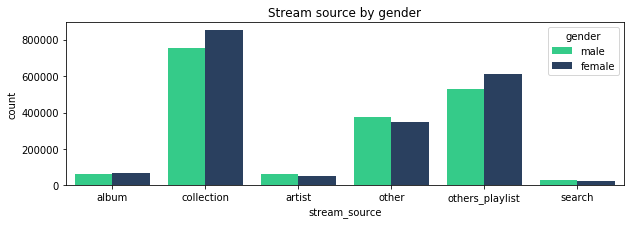

In [80]:
#Plot stream source by gender
plt.figure(figsize=(10,3))
sns.countplot(x="stream_source", hue="gender", data=df_music,palette= flatui).set_title('Stream source by gender')
plt.show()

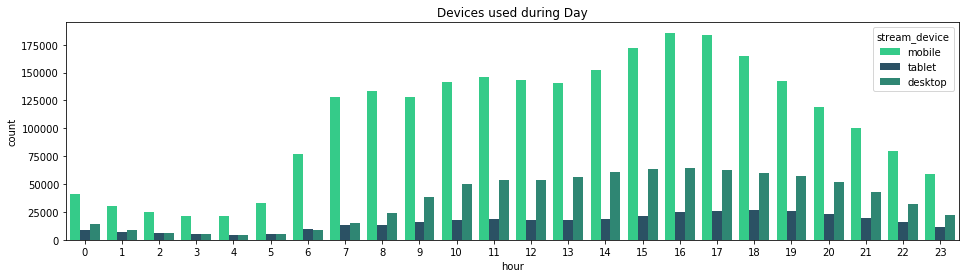

In [81]:
#Plot Operating system per year
plt.figure(figsize=(16,4))
sns.countplot(x="hour", hue="stream_device",data=df_music,palette= flatui2).set_title('Devices used during Day')
plt.show()

<div class="alert alert-success">
<p>

(9) Playlist
    --
    
Variable Exploration
</p> 

</div>

<div class="alert alert-success">
<p>

*Explanation:* With the knowledge about different individual attributes in mind, we can continue by looking at our four playlists in detail. Let's start analyzing the number of streams for each of the playlists.
<br>
 - Hot Hits UK
<br>
 - Massive Dance Hits
<br>
 - The Indie List
<br>
 - New Music Friday

</p> 

</div>

In [82]:
#attribute(s) overview
df_music[['playlist_name','playlist_id']].head(3)

,playlist_name,playlist_id
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN


In [83]:
#count playlist name and id; notice difference
df_music[['playlist_name','playlist_id']].count()

playlist_name     979110
playlist_id      1043871
dtype: int64

<div class="alert alert-success">

<p>
    
*Description:* Note that not all streams appear to be assigned to playlists. Some, however, are assigned to a 'playlist_id' yet lack the matching 'playlist_name'. This should be further investigated later on.
</p> 

</div>

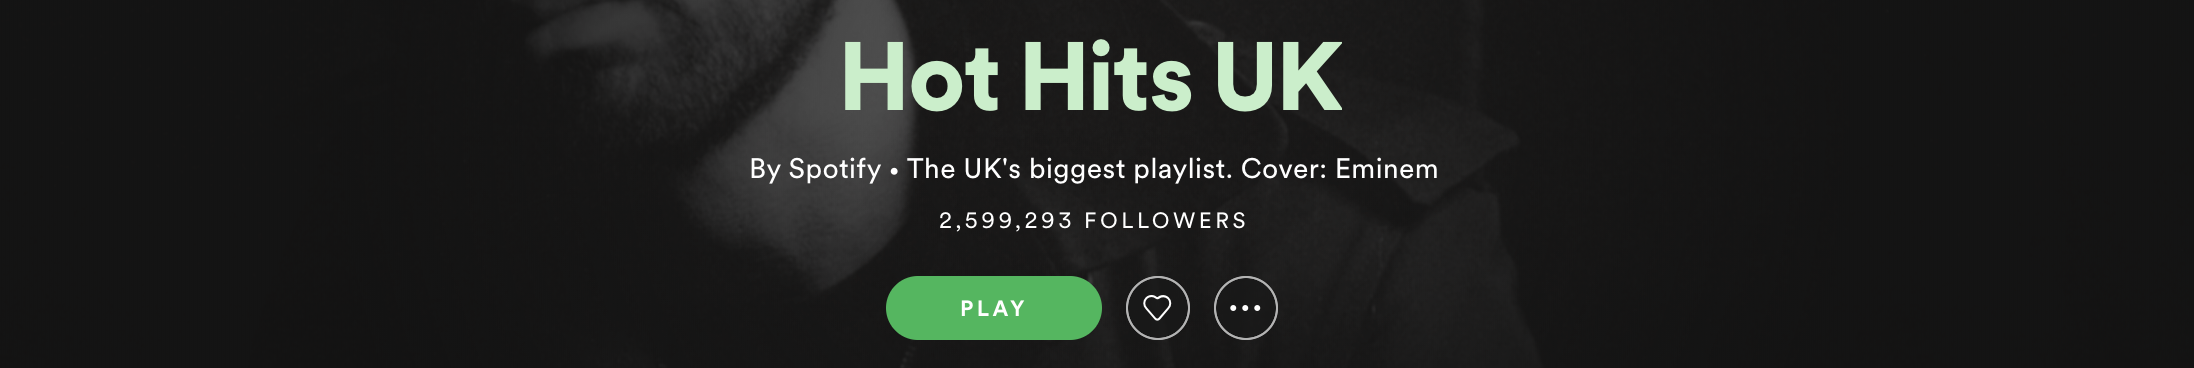

In [84]:
display(Image(filename='./GRAPHICS/Hot Hits UK_playlist.png'))

In [85]:
count_HotHits = df_music.playlist_name[df_music['playlist_name']=='Hot Hits UK'].count()
count_HotHits

193654

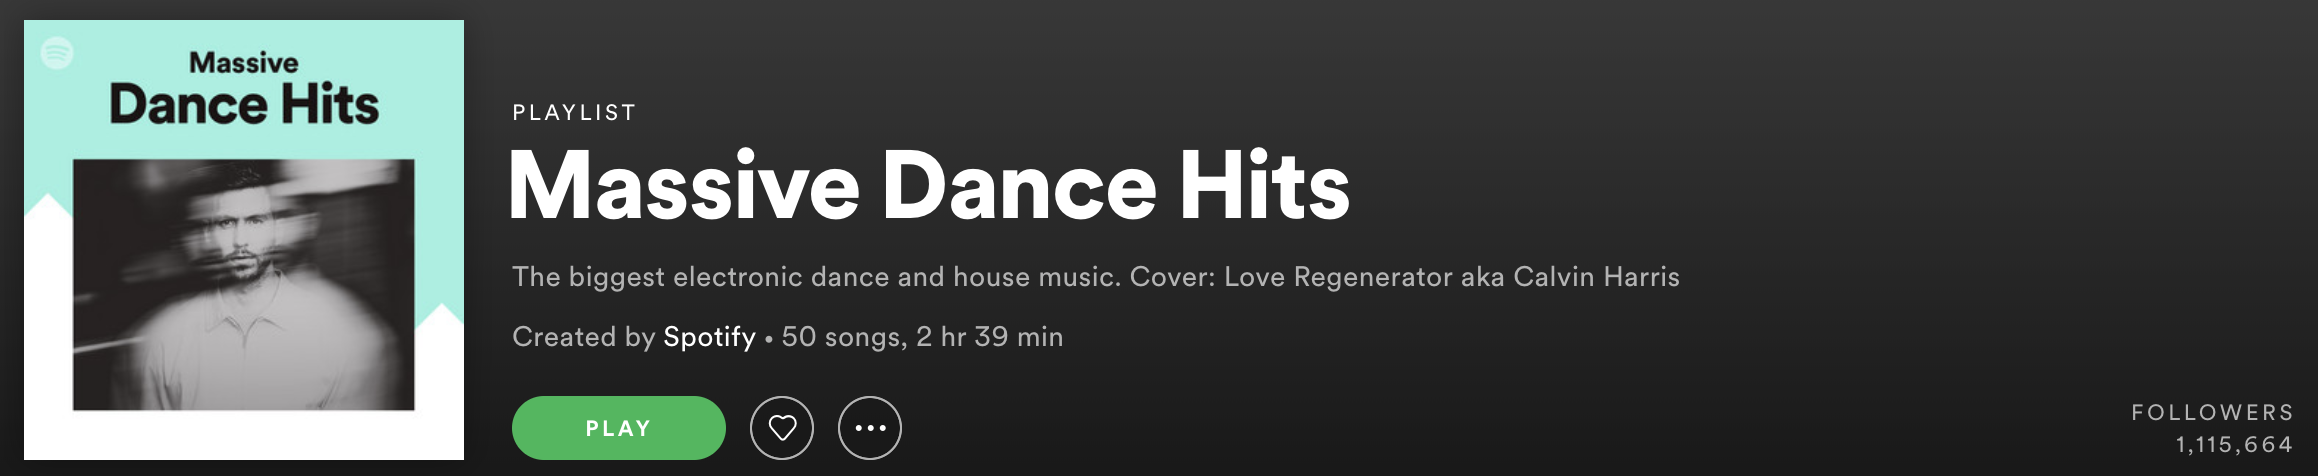

In [86]:
display(Image(filename='./GRAPHICS/Massive Dance Hits_playlist.png'))

In [87]:
count_Dancehits = df_music.playlist_name[df_music['playlist_name']=='Massive Dance Hits'].count()
count_Dancehits

7087

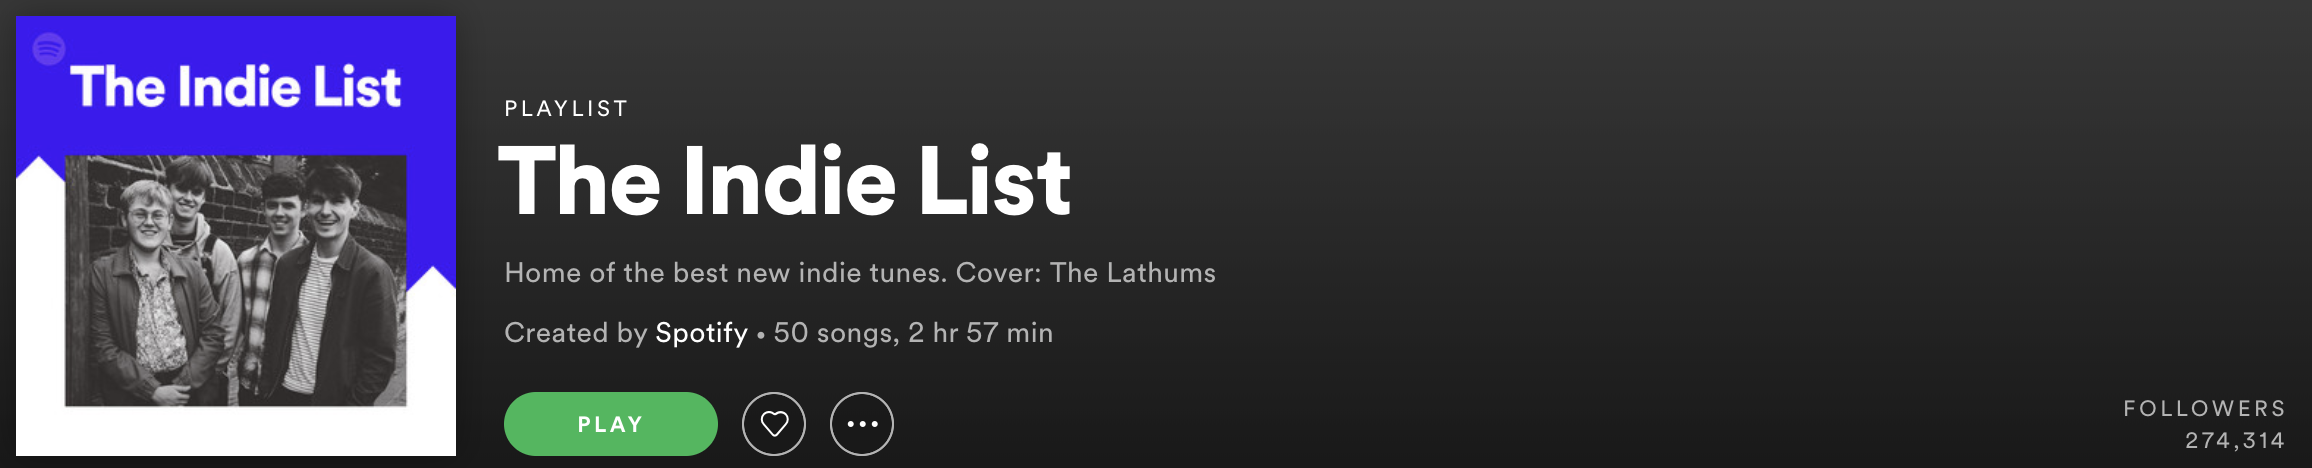

In [88]:
display(Image(filename='./GRAPHICS/The Indie List_playlist.png'))

In [89]:
count_Indie = df_music.playlist_name[df_music['playlist_name']=='The Indie List'].count()
count_Indie

1572

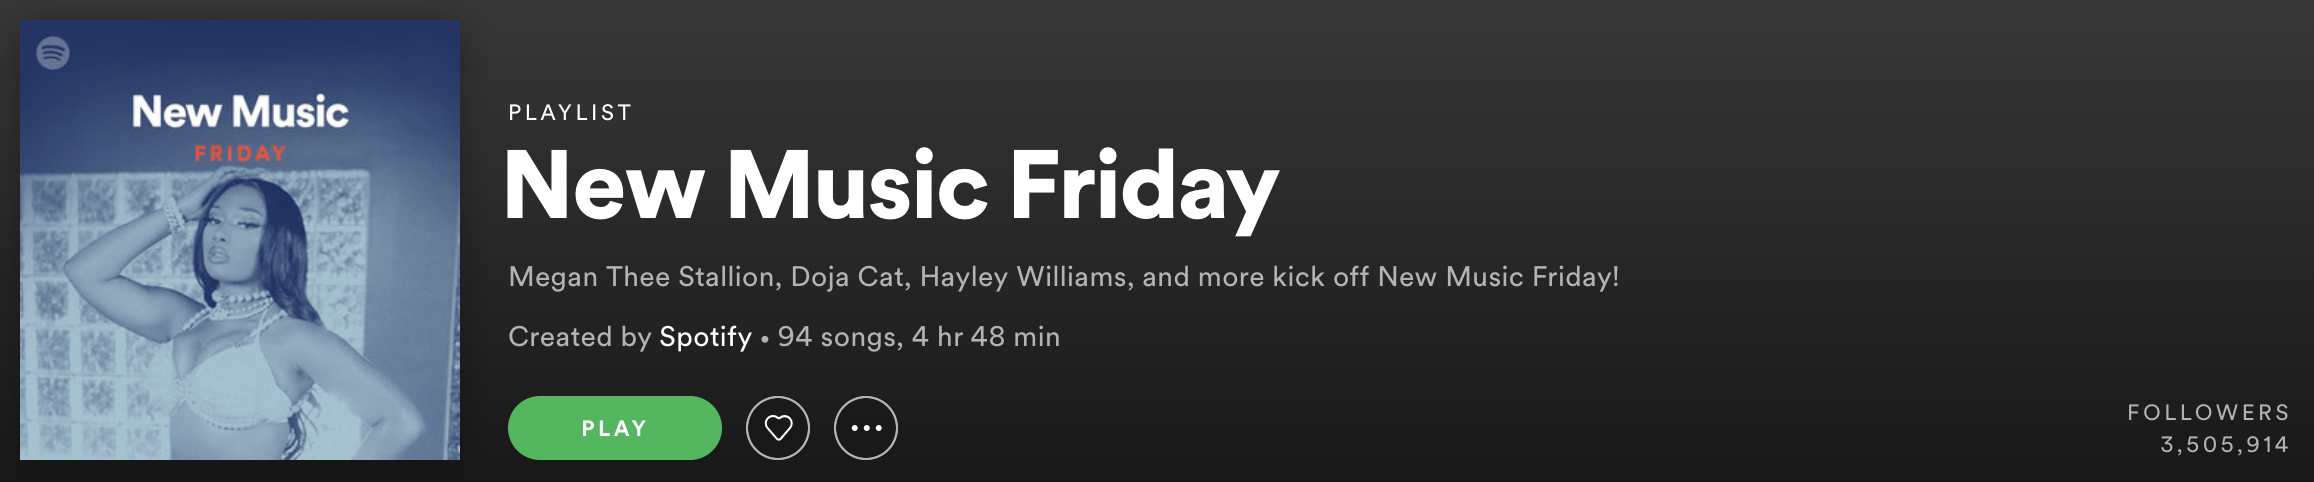

In [90]:
display(Image(filename='./GRAPHICS/New Music Friday_playlist.png'))

In [91]:
count_NewMusic = df_music.playlist_name[df_music['playlist_name']=='New Music Friday'].count()
count_NewMusic

466

<div class="alert alert-success">

<p>

*Description:* As the above counts indicate 'Hot Hits UK' has the most streams out of the four given playlists. In order to better visualise the distribution between the playlist we created the below pie-chart.
</p> 

</div>

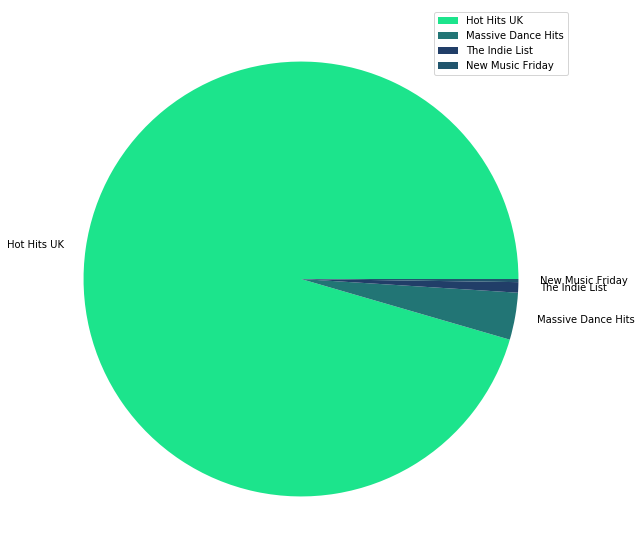

In [92]:
#pie chart playlist distribution (by # of streams)

#combining sums from counting
data_in = [['Hot Hits UK', count_HotHits], ['Massive Dance Hits', count_Dancehits],['The Indie List', count_Indie],['New Music Friday',count_NewMusic]] 

#generating new dataframe
df_count = pd.DataFrame(data_in, columns=['Source','Count'])
df_count = df_count.set_index('Source')
df_count.plot.pie(y='Count', figsize=(10, 10),colors=['#1CE48C','#227575', '#213E68',  '#21556D', '#21947B' ])
plt.ylabel(None)
plt.show()

<div class="alert alert-success">

<p>

*Insights:* As previously mentioned the four selected playlists only contain a fraction of the total streams. Out of all streams labeled with a playlist 20.71% are in the four playlists (or not assigned to a playlist at all). Others are scattered across different playlists. As seen in the graph below, nearly all of these are then accounted for by 'Hot Hits UK'.
</p> 

</div>

In [93]:
#count number of streams in 'other' (not the main 4) playlists
count_total = df_music.playlist_name.count()
count_other = df_music.playlist_name.count()-count_HotHits-count_Dancehits-count_Indie-count_NewMusic

In [94]:
print('Streams included in selected playlists',round((count_total-count_other)/count_total*100,2),'%')

Streams included in selected playlists 20.71 %


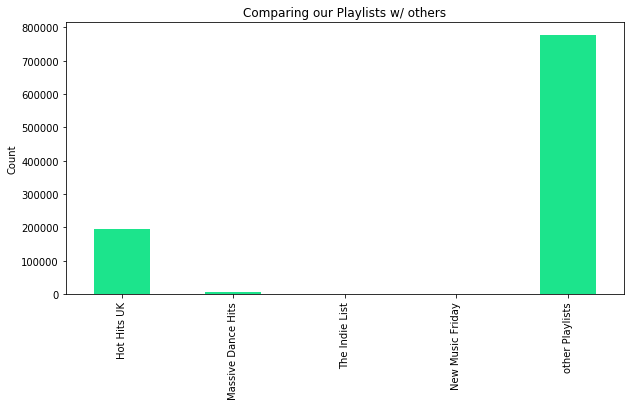

In [95]:
#bar chart comparing streams per playlist
data_in = [['Hot Hits UK', count_HotHits], ['Massive Dance Hits', count_Dancehits],['The Indie List', count_Indie],['New Music Friday',count_NewMusic],['other Playlists',count_other]] 
df_count = pd.DataFrame(data_in, columns=['Source','Count'])

ax = df_count.plot(kind='bar',figsize=(10,5),color='#1CE48C',fontsize=10, title='Comparing our Playlists w/ others')
#ax.set_yscale('log')
ax.set_xticklabels(df_count['Source'], minor=False)
plt.ylabel("Count")
ax.get_legend().remove()
plt.show()

<div class="alert alert-success">

<p>

*Insights:* The cluster-plot below gives us an idea of the most popular playlists in the data and how their stream counts compare to the other playlists in our dataset.
</p> 

</div>

In [96]:
# Keep a copy of original data in case of changes made to dataframe
all_artists = data.copy()

# Load laylist data
playlist_ids_and_titles = pd.read_csv('DATA/playlists_ids_and_titles.csv',encoding = 'latin-1',error_bad_lines=False,warn_bad_lines=False)

# Keep only those with 22 characters (data cleaning)
playlist_mapper = playlist_ids_and_titles[playlist_ids_and_titles.id.str.len()==22].drop_duplicates(['id'])

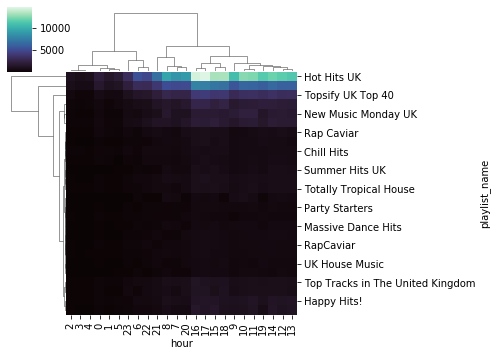

In [97]:
def plot_cluster(t,figsize=None):
    cg = sns.clustermap(t,figsize=(7, 5),cmap="mako")
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
#     plt.axes().set_title('ClusterMap')
    return cg

df = df_music.copy()
df['playlist_name'] = df.stream_source_uri.astype(str).str[-22:].map(playlist_mapper.set_index('id')['name'])
filter_playlists = df.stream_source_uri.value_counts().head(30).keys().tolist()
t = df[df.stream_source_uri.isin(filter_playlists)]
t = t.groupby(['playlist_name','hour']).size().unstack().fillna(0)
plot_cluster(t)
plt.show()

----
----


# <span style="color:#1CE48C"> Data Preperation and Feature Engineering </span>

<br>
From our business understanding, we know that our criteria for success is whether or not an artist has been on one of 4 key playlists.  The column ‘stream_source_uri’, contains data about the source of the stream – whether it was from an artist’s page, an album, a playlist etc. 

For streams coming from different playlists, only the Spotify URI code is provided. To make sense of this column and identify our key playlists, we can use the additional table provided that we cleaned above and named 'playlist_mapper'.

We can being by out data preperation by subsetting the 4 key playlists we are interested in and creating our dependent variable:

### <span style="color:#1CE48C"> Dependent Variable </span>

In [98]:
#create dependent variable
#set up the problem as one of classification, selecting the relevant playlists as the variable we are trying to model

#define 4 key playlists
keyplaylists = ['Hot Hits UK','Massive Dance Hits','The Indie List','New Music Friday']

#define dependent variable and assign values
df_music['success'] = 0
df_music.success[df_music['playlist_name'].isin(keyplaylists)] = 1

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [99]:
#(example) test to ensure that 'success' was assigned
df_music[df_music['success']==1].head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,...,danceability,acousticness,valence,user_age,buffer,new,artist_code,age,age_bin,success
3727,633,6339,"('small_artists_2016.csv', 6339)",10,20160410T12:45:00,False,db62b1d507bc4fd1bc8b4785d82d6356,USAT21601204,7.567991e+10,VINYL ON HBO,...,0.000,0.795,0.000,24.0,1,NaN,21,24.0,20s,1
52862,2831656,28316569,"('matoma_early.csv', 233444)",10,20160810T15:00:00,True,ef017af7dc9b4c59802fa54458988ac4,GBAYE1601052,1.902959e+11,MATOMA,...,0.592,0.172,0.424,25.0,1,NaN,167,25.0,20s,1
52870,2831664,28316649,"('matoma_early.csv', 233524)",10,20160810T09:45:00,True,ef017af7dc9b4c59802fa54458988ac4,GBAYE1601052,1.902959e+11,MATOMA,...,0.592,0.172,0.424,25.0,1,NaN,167,25.0,20s,1


In [100]:
#successful artists
def get_successful_artists(data):
    result = data[data['success']==1].groupby('artist_name').count()
    result.success = 1
    result = pd.DataFrame(result['success'])
    result = result.rename(columns = {'success': 'artist_success'})
    return result

In [101]:
#test function
get_successful_artists(df_music).shape

(82, 1)

In [102]:
#combine success attributes into one dataframe for merging of features later on
df_success_combined = get_successful_artists(df_music)
df_success_combined = df_success_combined.fillna(0)
df_success_combined.head(10)

,artist_success
artist_name,
A BOOGIE WIT DA HOODIE,1
A R I Z O N A,1
ABSOFACTO,1
ALL TVVINS,1
AMIR,1
ANNE-MARIE,1
ARMAN CEKIN,1
AXSHN,1
BASIC TAPE,1


Now that we have created our dependent variable – whether an artist is successful or not, we can look at generating a set of features, based on the columns within our dataset, that we think might best explain the reasons for this success. 

### <span style="color:#1CE48C"> Feature Engineering </span>

<br>
There are a large number of factors that could have an impact on the success of an artist, such as the influence of a playlist, or the popularity of an artist in a certain geographical region.
To build a predictive model for this problem, we first need to turn these (largely qualitative) factors into measurable quantities. Characteristics like ‘influence’ and ‘popularity’ need to be quantified and standardized for all artists, to allow for a fair comparison.
The accurateness of these numerical estimates will be the fundamental driver of success for any model we build. There are many approaches one might take to generate features. Based on the data columns available to us, a sensible approach is to divide our feature set into three groups:

1. Artist Features
2. Playlist Features
3. User Features



<div class="alert alert-success">
<p>
    
***Description:***
The following code-blocks focus on generating useful functions to determine artist features. In order to get a sense of the number of successful artists we start by looking at the number of (unique) successful artists applying the function defined beforehand.   



</p> 

</div>

In [103]:
#number of successful artists
len(get_successful_artists(df_music))

82

<div class="alert alert-success">
<p>

(1) Artist Feature
    --
    
Feature Engineering
</p> 

</div>

The following artist features have been created: 
- Streams per Artist
2. User Count per Artist
3. Artist Passion Score
4. Artist Danceability
5. Artist Acousticness
6. Artist Valance
7. Artists avg. Streamlength 
8. Artists Number of Tracks
9. Artists Number of Albums
10. Artists Playlist Count

### 1.1. Streams per Artist

In [104]:
#define function for stream count per artist
def stream_per_artist_count(data):
    res = data[data['success']==1]
    res = res.groupby('artist_name').count()
    return res['success']

<div class="alert alert-success">
<p>


*Description:* In order to verify each function we tested each function. This appraoch will be seen troughout the notebook. 


</p> 

</div>

In [105]:
#test function
stream_per_artist_count(df_music).sum(), stream_per_artist_count(df_music).shape

(202779, (82,))

In [106]:
#pd.DataFrame(stream_per_artist_count(df_music)).sort_values(by='success',ascending=False)

In [107]:
#define function for stream count per artist

#female
def stream_per_artist_count_female(data):
    res = data[(data['success']==1) & (data['gender']=='female')]
    res = res.groupby('artist_name').count()
    return res['success']

In [108]:
#test function
stream_per_artist_count_female(df_music).sum(), stream_per_artist_count_female(df_music).shape

(119588, (67,))

In [109]:
#define function for stream count per artist

#male
def stream_per_artist_count_male(data):
    res = data[(data['success']==1) & (data['gender']=='male')]
    res = res.groupby('artist_name').count()
    return res['success']

In [110]:
#test function
stream_per_artist_count_male(df_music).sum(), stream_per_artist_count_male(df_music).shape

(81052, (70,))

----

### 1.2. User Count per Artist

In [111]:
#number of unique users
df_music['customer_id'].nunique()

2091144

In [112]:
#define function for (unique) user count per artist

#general
def user_per_artist_count(data):
    res = data[data['success']==1]
    res = res.groupby('artist_name').customer_id.nunique()
    return res

In [113]:
#test function
user_per_artist_count(df_music).shape

(82,)

In [114]:
#define function for (unique) user count per artist

#female
def user_per_artist_count_female(data):
    res = data[(data['success']==1) & (data['gender']=='female')]
    res = res.groupby('artist_name').customer_id.nunique()
    return res

#male
def user_per_artist_count_male(data):
    res = data[(data['success']==1) & (data['gender']=='male')]
    res = res.groupby('artist_name').customer_id.nunique()
    return res

In [115]:
#test function
user_per_artist_count_female(df_music).sum(), user_per_artist_count_male(df_music).shape

(114628, (70,))

----

### 1.3. Artist Passion Score

In [116]:
#passion score (number of stream divided by the total number of users)
def passion_score(data):
    return stream_per_artist_count(data)/user_per_artist_count(data)

def passion_score_female(data):
    return stream_per_artist_count_female(data)/user_per_artist_count_female(data)

def passion_score_male(data):
    return stream_per_artist_count_male(data)/user_per_artist_count_male(data)

----

### 1.4. Artist Danceability

In [117]:
#average danceability per artist
def danceability_per_artist_avg(data):
    data = data.groupby('artist_name')[['danceability']].mean()
    return data

In [118]:
df_danceability = danceability_per_artist_avg(df_music)
df_danceability = df_danceability.set_axis(['artist_danceability'], axis=1, inplace=False)
df_danceability.head()

,artist_danceability
artist_name,
#90S UPDATE,0.6430
17 MEMPHIS,0.3890
2D,0.4910
3JS,0.6534
99 PERCENT,0.3610


----

### 1.5. Artist Acousticness

In [119]:
#average acousticness per artist
def acousticness_per_artist_avg(data):
    data = data.groupby('artist_name')[['acousticness']].mean()
    return data

In [120]:
df_acousticness = acousticness_per_artist_avg(df_music)
df_acousticness = df_acousticness.set_axis(['artist_acousticness'], axis=1, inplace=False)
df_acousticness.head()

,artist_acousticness
artist_name,
#90S UPDATE,0.015300
17 MEMPHIS,0.001930
2D,0.258000
3JS,0.431128
99 PERCENT,0.879000


----

### 1.6. Artist Valence

Valence describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (happy, cheerful, euphoric), while tracks with low valence sound more negative (sad, depressed, angry).
<br>
<br>
SOURCE: https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/

In [121]:
#average valence per artist
def valence_per_artist_avg(data):
    data = data.groupby('artist_name')[['valence']].mean()
    return data

In [122]:
df_valence = valence_per_artist_avg(df_music)
df_valence = df_valence.set_axis(['artist_valence'], axis=1, inplace=False)
df_valence.head()

,artist_valence
artist_name,
#90S UPDATE,0.0983
17 MEMPHIS,0.6770
2D,0.9590
3JS,0.4768
99 PERCENT,0.1280


----

### 1.7. Artists avg. Streamlength 

In [123]:
#average stream length per artist
def streamlength_per_artist_avg(data):
    data = data.groupby('artist_name')[['stream_length']].mean()
    return data

In [124]:
#test function
df_streamlength = streamlength_per_artist_avg(df_music)
df_streamlength = df_streamlength.set_axis(['artist_stream_length'], axis=1, inplace=False)
df_streamlength.head()

,artist_stream_length
artist_name,
#90S UPDATE,133.68750
17 MEMPHIS,177.25000
2D,81.00000
3JS,234.00000
99 PERCENT,154.10457


----

### 1.8. Artists Number of Tracks

In [125]:
#number of tracks per artist
def tracks_per_artist_count(data):
    data = data.groupby('artist_name')[['track_name']].nunique()
    return data

In [126]:
#test function
df_artist_tracks = tracks_per_artist_count(df_music)
df_artist_tracks = df_artist_tracks.set_axis(['artist_track_count'], axis=1, inplace=False)
df_artist_tracks.head()

,artist_track_count
artist_name,
#90S UPDATE,1
17 MEMPHIS,1
2D,1
3JS,4
99 PERCENT,2


----

### 1.9. Artists Number of Albums

In [127]:
#number of albums per artist
def albums_per_artist_count(data):
    #data = data[data['success']==1]
    data = data.groupby('artist_name')[['album_name']].nunique()
    return data

In [128]:
#test function
df_artist_albums = albums_per_artist_count(df_music)
df_artist_albums = df_artist_albums.set_axis(['artist_album_count'], axis=1, inplace=False)
df_artist_albums.head()

,artist_album_count
artist_name,
#90S UPDATE,1
17 MEMPHIS,1
2D,1
3JS,2
99 PERCENT,2


----

### 1.10.  Artists Playlist Count

In [129]:
df_artist_playlist_count = pd.DataFrame(df_music.groupby('artist_name')['playlist_name'].value_counts())
df_artist_playlist_count = df_artist_playlist_count.reset_index(level=1, drop=True).reset_index().groupby('artist_name').count()
df_artist_playlist_count = df_artist_playlist_count.rename(columns={"playlist_name":'artist_count_playlist'})

In [130]:
df_artist_playlist_count.head()

,artist_count_playlist
artist_name,
#90S UPDATE,2
17 MEMPHIS,1
99 PERCENT,18
A BOOGIE WIT DA HOODIE,148
A R I Z O N A,347


----

### Combining Artists Features

In [131]:
#dataframe merging for above functions

#for artist stream count
df_stream_count = pd.concat([stream_per_artist_count(df_music), stream_per_artist_count_female(df_music),
                               stream_per_artist_count_male(df_music)],axis=1, sort=False)
df_stream_count = df_stream_count.fillna(0)
df_stream_count = df_stream_count.set_axis(['artist_stream_count_general',
                                            'artist_stream_count_female',
                                            'artist_stream_count_male'], axis=1, inplace=False)

#for artist user count
df_user_count = pd.concat([user_per_artist_count(df_music), user_per_artist_count_female(df_music),
                           user_per_artist_count_male(df_music)],axis=1, sort=False)
df_user_count = df_user_count.fillna(0)
df_user_count = df_user_count.set_axis(['artist_user_count_general',
                                        'artist_user_count_female',
                                        'artist_user_count_male'], axis=1, inplace=False)

#for artist passion score
df_passion_score = pd.concat([passion_score(df_music), passion_score_female(df_music), 
                              passion_score_male(df_music)],axis=1, sort=False)
df_passion_score = df_passion_score.fillna(1)
df_passion_score = df_passion_score.set_axis(['artist_passion_score_general',
                                              'artist_passion_score_female',
                                              'artist_passion_score_male'], axis=1, inplace=False)

In [132]:
#combine artist features into one dataframe for merging of features later on
df_artist_combined = pd.concat([df_stream_count,df_user_count,df_passion_score,
                                df_streamlength, df_artist_tracks, df_artist_albums,
                                df_danceability, df_acousticness, df_valence,
                                df_artist_playlist_count],axis=1, sort=False)
df_artist_combined.head(5)

,artist_stream_count_general,artist_stream_count_female,artist_stream_count_male,artist_user_count_general,artist_user_count_female,artist_user_count_male,artist_passion_score_general,artist_passion_score_female,artist_passion_score_male,artist_stream_length,artist_track_count,artist_album_count,artist_danceability,artist_acousticness,artist_valence,artist_count_playlist
A BOOGIE WIT DA HOODIE,1.0,1.0,0.0,1.0,1.0,0.0,1.000000,1.000000,1.000000,163.245813,20,8,0.638510,0.052206,0.540364,148.0
A R I Z O N A,937.0,344.0,588.0,926.0,340.0,581.0,1.011879,1.011765,1.012048,189.223565,33,13,0.676498,0.326743,0.404002,347.0
ABSOFACTO,1.0,1.0,0.0,1.0,1.0,0.0,1.000000,1.000000,1.000000,193.956522,2,2,0.376841,0.910188,0.251232,6.0
ALL TVVINS,4.0,1.0,3.0,4.0,1.0,3.0,1.000000,1.000000,1.000000,195.473674,15,7,0.639840,0.220745,0.399729,79.0
AMIR,1.0,0.0,1.0,1.0,0.0,1.0,1.000000,1.000000,1.000000,187.587127,22,7,0.573425,0.091298,0.510780,39.0


----

<div class="alert alert-success">
<p>

(2) Playlist Feature
    --
    
Feature Engineering
</p> 

</div>

The following playlist features have been created: 
- Average Stream Count per Playlist
- Average Number of Users per Playlist
- Average Playlist Passion Score

<div class="alert alert-success">
<p>

*Description:* Understanding an artist’s growth as a function of his/her movement across different playlists is potentially key to understanding how to identify and breakout new artists on Spotify.
    <br>
Given that we have over 19,000 playlists in our dataset or 600 artists, using the playlists each artist has featured on, as categorical variables would lead to too many features and a very large, sparse matrix. Instead, we need to think of ways to summarize the impact of these playlists. We decided to take a closer look at the top 20 playlists as defined below.

</p> 

</div>

### 2.1 Average Stream Count per Playlist

In [133]:
#define list of top 20 overall playlists measured by stream counts
list_abs_top20 = dict(df_music['playlist_name'].value_counts().nlargest(20))
list_female_top20 = dict(df_music.playlist_name[df_music['gender']=='female'].value_counts().nlargest(20))
list_male_top20 = dict(df_music.playlist_name[df_music['gender']=='male'].value_counts().nlargest(20))

In [134]:
#average stream counts in top 20 playlists by artist

#define function
def playlist_avg_stream_counts(data, liste):
    #create new column indicating if stream is in top 20 playlist
    data['top20_playlist'] = 0
    data.top20_playlist[data['playlist_name'].isin(liste)] = 1
    
    #cut dataframe to top 20 playlist
    data = data[data['top20_playlist']==1]

    #generate output by grouping along artists and number of streams (divided by #of playlists)
    data = data.groupby(['artist_name'])[['top20_playlist']].count()/20
    data = data.rename(columns = {'top20_playlist': 'score'})

    return data

In [135]:
#test function
playlist_avg_stream_counts(df_music, list_abs_top20).head()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,score
artist_name,
A BOOGIE WIT DA HOODIE,156.60
A R I Z O N A,733.85
ALL TVVINS,3.35
AMIR,0.05
ANNABEL JONES,6.50


----

### 2.2 Average Number of Users per Playlist

In [136]:
#average user count in top 20 playlists by artist

#define function
def playlist_avg_number_of_users(data, liste):
    #create new column indicating if stream is in top 20 playlist
    data['top20_playlist'] = 0
    data.top20_playlist[data['playlist_name'].isin(liste)] = 1
    
    #cut dataframe to top 20 playlist
    data = data[data['top20_playlist']==1]

    #generate output by grouping along artists and filter for unique customer ids (divided by #of playlists)
    data = pd.DataFrame(data.groupby(['artist_name']).customer_id.nunique()/20)
    data = data.rename(columns = {'customer_id': 'score'})
    
    return data

In [137]:
#test function
playlist_avg_number_of_users(df_music, list_abs_top20).head()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,score
artist_name,
A BOOGIE WIT DA HOODIE,147.55
A R I Z O N A,707.45
ALL TVVINS,3.25
AMIR,0.05
ANNABEL JONES,5.90


----

### 2.3 Average Playlist Passion Score

In [138]:
#def playlist_avg_passion_score(data)

#define function
def playlist_avg_passion_score(data, liste):
    return playlist_avg_stream_counts(data, liste)/playlist_avg_number_of_users(data, liste)

In [139]:
#test function
playlist_avg_passion_score(df_music, list_abs_top20).head()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,score
artist_name,
A BOOGIE WIT DA HOODIE,1.061335
A R I Z O N A,1.037317
ALL TVVINS,1.030769
AMIR,1.000000
ANNABEL JONES,1.101695


----

### Combining Artists Features

In [140]:
#dataframe merging for above functions

#for playlist stream count
df_playlist_stream_count = pd.concat([playlist_avg_stream_counts(df_music, list_abs_top20), 
                                      playlist_avg_stream_counts(df_music, list_female_top20), 
                                      playlist_avg_stream_counts(df_music, list_male_top20)],axis=1, sort=False)
df_playlist_stream_count = df_playlist_stream_count.fillna(0)
df_playlist_stream_count = df_playlist_stream_count.set_axis(['playlist_stream_count_general',
                                                              'playlist_stream_count_female',
                                                              'playlist_stream_count_male'], axis=1, inplace=False)

#for playlist user count
df_playlist_user_count = pd.concat([playlist_avg_number_of_users(df_music, list_abs_top20), 
                                    playlist_avg_number_of_users(df_music, list_female_top20), 
                                    playlist_avg_number_of_users(df_music, list_male_top20)],axis=1, sort=False)
df_playlist_user_count = df_playlist_user_count.fillna(0)
df_playlist_user_count = df_playlist_user_count.set_axis(['playlist_user_count_general',
                                                          'playlist_user_count_female',
                                                          'playlist_user_count_male'], axis=1, inplace=False)

#for playlist passion score
df_playlist_passion_score = pd.concat([playlist_avg_passion_score(df_music, list_abs_top20), 
                                       playlist_avg_passion_score(df_music, list_female_top20), 
                                       playlist_avg_passion_score(df_music, list_male_top20)],axis=1, sort=False)
df_playlist_passion_score = df_playlist_passion_score.fillna(1)
df_playlist_passion_score = df_playlist_passion_score.set_axis(['playlist_passion_score_general',
                                                                'playlist_passion_score_female',
                                                                'playlist_passion_score_male'], axis=1, inplace=False)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [141]:
#combine artist features into one dataframe for merging of features later on
df_playlist_combined = pd.concat([df_playlist_stream_count,
                                  df_playlist_user_count,
                                  df_playlist_passion_score],axis=1, sort=False)
df_playlist_combined.head()

,playlist_stream_count_general,playlist_stream_count_female,playlist_stream_count_male,playlist_user_count_general,playlist_user_count_female,playlist_user_count_male,playlist_passion_score_general,playlist_passion_score_female,playlist_passion_score_male
A BOOGIE WIT DA HOODIE,156.60,0.10,156.65,147.55,0.10,147.60,1.061335,1.000000,1.061314
A R I Z O N A,733.85,734.10,684.55,707.45,707.65,659.90,1.037317,1.037377,1.037354
ALL TVVINS,3.35,3.35,3.40,3.25,3.25,3.30,1.030769,1.030769,1.030303
AMIR,0.05,0.05,0.05,0.05,0.05,0.05,1.000000,1.000000,1.000000
ANNABEL JONES,6.50,6.50,6.50,5.90,5.90,5.90,1.101695,1.101695,1.101695


<div class="alert alert-success">
<p>

(3) User-base Feature
    --
    
Feature Engineering
</p> 

</div>

The following playlist features have been created: 
- User Gender Breakdown
- User Age Breakdown
- PCA Features

### 3.1 User Gender Breakdown

In [142]:
#gender breakdown

#define function for gender breakdown
def gender_breakdown(data):
    dummies = pd.get_dummies(data['gender'],prefix='gender')
    df_gender = pd.concat([data,dummies],axis=1)
    result = pd.crosstab(df_gender['artist_name'],df_gender['gender']).apply(lambda r: (r/r.sum()), axis=1)
    return result

In [143]:
#test function
gender_breakdown(df_music)

gender,female,male
artist_name,,
#90S UPDATE,0.437500,0.562500
17 MEMPHIS,0.666667,0.333333
2D,0.000000,1.000000
3JS,0.200000,0.800000
99 PERCENT,0.677926,0.322074
...,...,...
ZAK ABEL,0.530072,0.469928
ZAKOPOWER,0.000000,1.000000
ZARCORT,0.200000,0.800000


In [144]:
#dataframe for combining into single dataframe at the end
df_gender = gender_breakdown(df_music)

### 3.2 User Age Breakdown

In [145]:
#age breakdown

#define sub-dataframe
df_age = df_music

#set age as year (of stream) minus birth year
df_age['age_mean'] = round(df_age['year'] - df_age['birth_year'], 0)

#calculate average user age per artist
df_age = df_age.groupby('artist_name').mean()
df_age = pd.DataFrame(df_age['age_mean'])
df_age.head(5)

,age_mean
artist_name,
#90S UPDATE,29.250000
17 MEMPHIS,25.750000
2D,14.000000
3JS,36.200000
99 PERCENT,23.825545


<div class="alert alert-success">
<p>  

*Description:* In order to gain more insights from the age analysis, we continued by generating age bin and the respective percentage of users in each bin.
    
</p> 

</div>

In [146]:
#age breakdown (in age bins)

#define function for age bin breakdown
def age_breakdown(data):
    #again, define actual age using 'year' and 'birth-year'
    data['age'] = round(data['year'] - data['birth_year'], 0)
    
    #add 'age_bin' column to the dataframe with labels for each bin
    data["age_bin"] = pd.cut(x=data["age"], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000],
                             labels=['<20','20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '>100'])
    
    #generate the output by creating a matrix
    result = pd.DataFrame(pd.crosstab(data['artist_name'],data['age_bin']).apply(lambda r: (r/r.sum())*100, axis=1))
    
    return result

In [147]:
#test function
age_breakdown(df_music)

age_bin,<20,20s,30s,40s,50s,60s,70s,80s,90s,>100
artist_name,,,,,,,,,,
#90S UPDATE,6.250000,50.000000,37.500000,6.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17 MEMPHIS,16.666667,75.000000,0.000000,0.000000,8.333333,0.000000,0.000000,0.000000,0.000000,0.000000
2D,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3JS,0.000000,40.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99 PERCENT,52.881620,29.517134,6.464174,8.255452,2.336449,0.155763,0.077882,0.077882,0.077882,0.155763
...,...,...,...,...,...,...,...,...,...,...
ZAK ABEL,22.337537,51.426552,15.098761,6.989547,3.340401,0.491017,0.055797,0.037198,0.029759,0.193431
ZAKOPOWER,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ZARCORT,24.000000,44.000000,24.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Combine initial User Features

In [148]:
#generate inclusive age dataframe for combining into single dataframe at the end
df_age_combined = age_breakdown(df_music)
df_age_combined.columns = df_age_combined.columns.add_categories(['mean'])
df_age_combined['mean'] = df_age['age_mean']

#add prefix 'age' for easy identification
df_age_combined = df_age_combined.add_prefix('age_')

In [149]:
#combine user features into one dataframe for merging of features later on
df_user_combined = df_age_combined
df_user_combined['gender_female_share'] = df_gender['female']
df_user_combined['gender_male_share'] = df_gender['male']

#showcase result w/ '.head()'
df_user_combined.head(3)

age_bin,age_<20,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_80s,age_90s,age_>100,age_mean,gender_female_share,gender_male_share
artist_name,,,,,,,,,,,,,
#90S UPDATE,6.250000,50.0,37.5,6.25,0.000000,0.0,0.0,0.0,0.0,0.0,29.25,0.437500,0.562500
17 MEMPHIS,16.666667,75.0,0.0,0.00,8.333333,0.0,0.0,0.0,0.0,0.0,25.75,0.666667,0.333333
2D,100.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,14.00,0.000000,1.000000


<div class="alert alert-success">
<p>  

***Insights:*** To further add detail to the analysis, we continued by visualizing the age bins leveraging the previously defined function. As expected the peak of users is centered aroud '20s', with a rather young user base in general.

</p> 

</div>

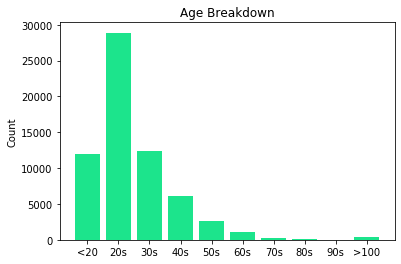

In [150]:
#visualization of age bins

#generate new dataframe leveraging previously defined function
age_visual = age_breakdown(df_music)

#list of sums for each columns (or age bin)
age_visual_dict = dict(age_visual.sum())

#plot the above sums in bar chart
plt.bar(range(len(age_visual_dict)), list(age_visual_dict.values()), align='center', color="#1CE48C")
plt.xticks(range(len(age_visual_dict)), list(age_visual_dict.keys()))
plt.title('Age Breakdown')
plt.ylabel("Count")
plt.show()

**Principle Component Analysis**

The data also contains a partial region code of the listener. We might want to consider including the regional breakdown of streams per artist as a feature of our model, to know if streams for certain regions are particularly influential on the future performance of an artist. 

However, we have over 400 unique regions and like playlists, including them all would lead to too many features and a large sparse matrix. One way in which to extract relevant ‘generalized’ features of each region would be to incorporate census and demographic data, from publicly available datasets. 

This is however beyond the scope of this courswork. Instead, a better way to summarize the impact of regional variation in streams is to use dimensionality reduction techniques. Here we will use Principle Component Analysis (PCA) to capture the regional variation in stream count.

PCA captures the majority of variation in the original feature set and represents it as a set of new orthogonal variables. Each ‘component’ of PCA is a linear combination of every feature, i.e. playlist in the dataset. Use **`scikit-learn`**’s PCA module (Pedregosa, et al., 2011) for generating PCA components.

For a comprehensive understanding of how sklearn's PCA module works, please refer to the sklearn documentation. We will using 10 components of PCA in our model.

*Note: We could also apply a similar method to condense variation in stream across the 19,600 different playlists in our dataset.*

### 3.3 PCA Features

In [151]:
#import additional library
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

<div class="alert alert-success">
<p>  

*Description:* The following code transformes the original dataframe into a matrix of artist names and region codes. This will allow us to start our dimension reduction on region codes.
<br>    
Note: 'ACTION: PCA features' refers to features from region and artists, rather than the stated users.

</p> 

</div>

In [152]:
#generate dataframe matrix of artist names (y-axis) and region codes (x-axis)
df_pca = pd.crosstab(index=df_music['artist_name'], columns = df_music['region_code'])
df_pca.head()

region_code,0,500,501,502,504,505,506,508,510,511,...,SE-G,SE-H,SE-M,SE-N,SE-O,SE-S,SE-T,SE-W,SE-Y,SE-Z
artist_name,,,,,,,,,,,,,,,,,,,,,
#90S UPDATE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17 MEMPHIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3JS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99 PERCENT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
#standardize the features onto unit scale (mean = 0 and variance = 1) using 'StandardScaler()'
x = pd.DataFrame(StandardScaler().fit_transform(df_pca))

In [154]:
#check whether the normalized data has a mean of zero and a standard deviation of one
np.mean(x).mean(), np.std(x).mean()

(-2.9798244323391765e-17, 1.000000000000001)

In [155]:
#applies PCA to reduce the dimensionality of the dataset down to n=10 dimensions
pca_10 = decomposition.PCA(n_components=10)

#fitting the PCA transformer to the dataframe
principalComponents = pca_10.fit_transform(x)

#project the original data to n=10 components
pca_regions_output_10 = pd.DataFrame(data = principalComponents, index = df_pca.index)

In [156]:
#calculate cummulative sum of explained variance
cumsum_10 = np.cumsum(pca_10.explained_variance_ratio_)
print(cumsum_10)

[0.5374452  0.58517171 0.6275547  0.66156358 0.69096755 0.71811673
 0.74363042 0.76324137 0.78105943 0.79724434]


Text(0.5, 1.0, 'Explained Variance as Function of Number of Dimensions (n=10)')

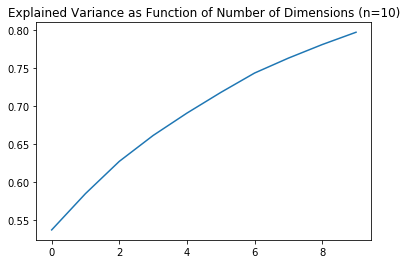

In [157]:
#explained variance as a function of the number of dimensions (n=10); note: no 'elbow' visible
plt.plot(cumsum_10)
plt.title('Explained Variance as Function of Number of Dimensions (n=10)')

Check the PCA feature table to make sure the dataframe looks as expected. Comment on anything the looks important. 

In [158]:
#rename columns
pca_regions_output_10 = pca_regions_output_10.add_prefix('pca_')
                                    
#output dataframe dimension reduction ('pca_regions_output')
pca_regions_output_10.head(5)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
artist_name,,,,,,,,,,
#90S UPDATE,-3.043846,0.140668,-0.217304,-0.000919,0.116564,-0.081906,-0.217640,-0.003046,0.021729,-0.006441
17 MEMPHIS,-3.042596,0.140827,-0.218421,-0.001649,0.115620,-0.082876,-0.218215,-0.002824,0.020448,-0.007463
2D,-3.048887,0.141179,-0.216041,-0.000494,0.117797,-0.082681,-0.217613,-0.003185,0.021763,-0.006678
3JS,-3.046863,0.140735,-0.216914,-0.000552,0.117404,-0.083273,-0.217438,-0.003190,0.021561,-0.006822
99 PERCENT,-2.480358,0.083553,-0.439889,-0.089710,-0.010249,-0.061247,-0.246259,0.031792,-0.039059,-0.040060


<div class="alert alert-success">
<p>  

*Insights:* As we have seen above, applying n=10 yields in reasonable results. However, we are unable to draw conclusions about the 'elbow' of the curve. IN other words, we are not yet sure how many components to include to reach the optimal ration between '#components' and 'explained variance'. Therefore, we now plot showcasing all possible values of 'n_components'.

</p> 

</div>

Text(0.5, 1.0, 'Explained Variance as Function of Number of Dimensions')

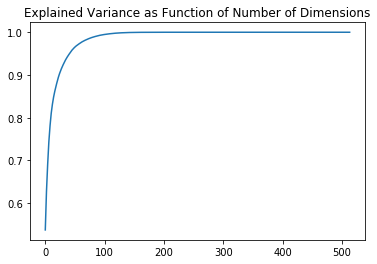

In [159]:
#standardize the features onto unit scale (mean = 0 and variance = 1) using 'StandardScaler()'
x = pd.DataFrame(StandardScaler().fit_transform(df_pca))

#now, we do not specify a upper border for 'n_components'
pca_all = decomposition.PCA() 

#fitting the PCA transformer to the dataframe
principalComponents = pca_all.fit_transform(x)

#project the original data onto new components
pca_regions_output = pd.DataFrame(data = principalComponents)

#calculate cumsum of variance
cumsum_all = np.cumsum(pca_all.explained_variance_ratio_)

#plot the cumsum
plt.plot(cumsum_all)
plt.title('Explained Variance as Function of Number of Dimensions')

<div class="alert alert-success">
<p>  

*Insights:* As one can notice there is a sharp 'elbpow' somewhere around n=50. Let's further investigate this by looking at the 95% explained variable in the following graph.

</p> 

</div>

Text(0.5, 1.0, 'Explained Variance as Function of Number of Dimensions (variance up to 95%)')

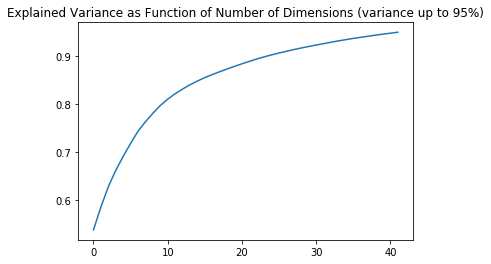

In [160]:
#again, standardize the features onto unit scale (mean = 0 and variance = 1) using 'StandardScaler()'
x = pd.DataFrame(StandardScaler().fit_transform(df_pca))

#specify the 95% variance for 'n_components'
pca_095 = decomposition.PCA(0.95)

#fitting the PCA transformer to the dataframe
principalComponents = pca_095.fit_transform(x)

#project the original data onto new components
pca_regions_output = pd.DataFrame(data = principalComponents)

#calculate cumsum of variance
cumsum_095 = np.cumsum(pca_095.explained_variance_ratio_)

#plot the cumsum
plt.plot(cumsum_095)
plt.title('Explained Variance as Function of Number of Dimensions (variance up to 95%)')

<div class="alert alert-success">
<p>  

*Insights:* We can see that 95% of the variance can be explained with (roughly) n=40. Since, however, n=40 is quite a large number of components one has to make a decision on the aimed reduction.
    <br>
    <br>
As previously shown and seen in the above graph n=10 is able to explain nearly 80% of variance (0.7972185) while the number of components is still reasonably low.

</p> 

</div>

### <span style="color:#1CE48C"> Data Transformation </span>
<br>
The final step is to decide whether or not to normalize/transform any of the features. 

We should normalize data if we are more interested in the relative rather than absolute differences between variables. Given that all the numerical features in our dataset (centrality, lift, influence, gender breakdown, age breakdown) were meaningful, i.e. distances did make a difference)

We will explore the following steps:
1. Feature Transformation
2. Preprocessing
3. Multi-Colinearity
4. Class Balance

Now we can combine all of our features that we generated above, into a dataframe that can be processed by a machine learning algorithm:

In [161]:
#The following gives an overview of all previously defined dataframes which will be merged into the final dataframe:
    #df_success_combined
    #df_artist_combined
    #df_playlist_combined
    #df_user_combined
    #pca_regions_output_10

df_success_combined.shape, df_artist_combined.shape, df_playlist_combined.shape, df_user_combined.shape, pca_regions_output_10.shape

((82, 1), (639, 16), (128, 9), (639, 13), (628, 10))

----

In [162]:
#generate combined dataframe for all self defined features
df_combined = pd.concat([df_success_combined,df_artist_combined,
                         df_playlist_combined,df_user_combined,
                         pca_regions_output_10],axis=1, sort=False)
df_combined.columns

Index(['artist_success', 'artist_stream_count_general',
       'artist_stream_count_female', 'artist_stream_count_male',
       'artist_user_count_general', 'artist_user_count_female',
       'artist_user_count_male', 'artist_passion_score_general',
       'artist_passion_score_female', 'artist_passion_score_male',
       'artist_stream_length', 'artist_track_count', 'artist_album_count',
       'artist_danceability', 'artist_acousticness', 'artist_valence',
       'artist_count_playlist', 'playlist_stream_count_general',
       'playlist_stream_count_female', 'playlist_stream_count_male',
       'playlist_user_count_general', 'playlist_user_count_female',
       'playlist_user_count_male', 'playlist_passion_score_general',
       'playlist_passion_score_female', 'playlist_passion_score_male',
       'age_<20', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_80s', 'age_90s', 'age_>100', 'age_mean',
       'gender_female_share', 'gender_male_share', 'pca_0'

In [163]:
#generate csv file as working start for further analysis
df_combined.to_csv(r'final_pre_feature_transformation.csv',index=True)

In [164]:
#re-load csv file; required due to limited sever capcity
df_combined = pd.read_csv('final_pre_feature_transformation.csv')
print('rows:',len(df_combined))
df_combined = df_combined.rename(columns={'Unnamed: 0':'artist_name'}).set_index('artist_name')

rows: 639


<div class="alert alert-success">
<p>

(1) Feature Transformation
    --
    
Data Transformation
</p> 

</div>

<div class="alert alert-success">
<p>  

***Description:***
As machine learning algorithms perform poorly if the numercial attributes have different scales, we need to transform features.
    
</p> 

</div>

In [165]:
#import further libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from matplotlib.pyplot import figure

In [166]:
#creating sub-dataframe for this task
df_scale_input = df_combined

#drop binary success factors as we have no interest in scaling them
df_scale_input = df_scale_input.drop(['artist_success'], axis=1)
df_scale_input.shape

(639, 48)

<div class="alert alert-success">
<p>  

***Description:*** The MinMaxScaler scales and translates each feature individually such that it is in the given range on the dataset. In detail, it rescales the data set such that all feature values are in the range [0, 1].
<br>
One has to note that both StandardScaler & MinMaxScaler are very sensitive to the presence of outliers - however, our dataset appears to be suited for them.

</p> 

</div>

In [167]:
#apply min-max scaling method
scaler = preprocessing.MinMaxScaler() 
scaled_df = scaler.fit_transform(df_scale_input)
scaled_df = pd.DataFrame(scaled_df, columns=df_scale_input.columns)
scaled_df = scaled_df.set_index(df_scale_input.index)

In [168]:
#combining trnasformed values with binary indicators of success again
df_combined = pd.concat([df_success_combined,scaled_df], axis=1, sort=False)

#showcase initial output
df_combined.head()

,artist_success,artist_stream_count_general,artist_stream_count_female,artist_stream_count_male,artist_user_count_general,artist_user_count_female,artist_user_count_male,artist_passion_score_general,artist_passion_score_female,artist_passion_score_male,...,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
A BOOGIE WIT DA HOODIE,1.0,0.000000,0.000046,0.000000,0.000000,0.000048,0.000000,0.000000,0.000000,0.000000,...,0.057738,0.359824,0.450353,0.434261,0.313680,0.333464,0.388308,0.493920,0.491524,0.300189
A R I Z O N A,1.0,0.025296,0.015701,0.040068,0.026456,0.016398,0.041989,0.137833,0.155234,0.114706,...,0.225731,0.348240,0.593046,0.508063,0.637305,0.166161,0.788682,1.000000,0.000000,0.207787
ABSOFACTO,1.0,0.000000,0.000046,0.000000,0.000000,0.000048,0.000000,0.000000,0.000000,0.000000,...,0.000477,0.353765,0.362831,0.451610,0.382688,0.303450,0.413819,0.483222,0.401963,0.295637
ALL TVVINS,1.0,0.000081,0.000046,0.000204,0.000086,0.000048,0.000217,0.000000,0.000000,0.000000,...,0.017327,0.351219,0.354427,0.450127,0.374883,0.304513,0.411047,0.485614,0.397625,0.294896
AMIR,1.0,0.000000,0.000000,0.000068,0.000000,0.000000,0.000072,0.000000,0.000000,0.000000,...,0.005723,0.352058,0.360971,0.453275,0.382373,0.303659,0.412796,0.483549,0.398285,0.291655


In [169]:
df_combined.columns

Index(['artist_success', 'artist_stream_count_general',
       'artist_stream_count_female', 'artist_stream_count_male',
       'artist_user_count_general', 'artist_user_count_female',
       'artist_user_count_male', 'artist_passion_score_general',
       'artist_passion_score_female', 'artist_passion_score_male',
       'artist_stream_length', 'artist_track_count', 'artist_album_count',
       'artist_danceability', 'artist_acousticness', 'artist_valence',
       'artist_count_playlist', 'playlist_stream_count_general',
       'playlist_stream_count_female', 'playlist_stream_count_male',
       'playlist_user_count_general', 'playlist_user_count_female',
       'playlist_user_count_male', 'playlist_passion_score_general',
       'playlist_passion_score_female', 'playlist_passion_score_male',
       'age_<20', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_80s', 'age_90s', 'age_>100', 'age_mean',
       'gender_female_share', 'gender_male_share', 'pca_0'

<div class="alert alert-success">
<p>

(2) Preprocessing
    --
    
Data Transformation
</p> 

</div>

<div class="alert alert-success">
<p>  

*Description:* Before we can run any models on our dataset, we must make sure it is prepared and cleaned to avoid errors in results. This stage is generally refered to as preprocessing.

To begin with, we need to deal with missing data in the dataframe - the ML algorithm will not be able to process NaN or missing values. 

For this study, we will be imputing missing numerical values, and filling any one which we were not able to imput, with 0.
    
</p> 

</div>

In [170]:
#import further libraries

from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import Imputer

<div class="alert alert-success">
<p>  

*Description:* We leverage the imputer to fill missing values. In detail, apllying 'constant' as a strategy for the missing values and the fill value of '0'. The result can be seen in the below table.
    
</p> 

</div>

In [171]:
#apply imputer to treat missing values
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)
df_combined = pd.DataFrame(imp.fit_transform(df_combined), index = df_combined.index, columns = df_combined.columns)
df_combined.head(5)

,artist_success,artist_stream_count_general,artist_stream_count_female,artist_stream_count_male,artist_user_count_general,artist_user_count_female,artist_user_count_male,artist_passion_score_general,artist_passion_score_female,artist_passion_score_male,...,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
A BOOGIE WIT DA HOODIE,1.0,0.000000,0.000046,0.000000,0.000000,0.000048,0.000000,0.000000,0.000000,0.000000,...,0.057738,0.359824,0.450353,0.434261,0.313680,0.333464,0.388308,0.493920,0.491524,0.300189
A R I Z O N A,1.0,0.025296,0.015701,0.040068,0.026456,0.016398,0.041989,0.137833,0.155234,0.114706,...,0.225731,0.348240,0.593046,0.508063,0.637305,0.166161,0.788682,1.000000,0.000000,0.207787
ABSOFACTO,1.0,0.000000,0.000046,0.000000,0.000000,0.000048,0.000000,0.000000,0.000000,0.000000,...,0.000477,0.353765,0.362831,0.451610,0.382688,0.303450,0.413819,0.483222,0.401963,0.295637
ALL TVVINS,1.0,0.000081,0.000046,0.000204,0.000086,0.000048,0.000217,0.000000,0.000000,0.000000,...,0.017327,0.351219,0.354427,0.450127,0.374883,0.304513,0.411047,0.485614,0.397625,0.294896
AMIR,1.0,0.000000,0.000000,0.000068,0.000000,0.000000,0.000072,0.000000,0.000000,0.000000,...,0.005723,0.352058,0.360971,0.453275,0.382373,0.303659,0.412796,0.483549,0.398285,0.291655


In [172]:
df_combined.columns

Index(['artist_success', 'artist_stream_count_general',
       'artist_stream_count_female', 'artist_stream_count_male',
       'artist_user_count_general', 'artist_user_count_female',
       'artist_user_count_male', 'artist_passion_score_general',
       'artist_passion_score_female', 'artist_passion_score_male',
       'artist_stream_length', 'artist_track_count', 'artist_album_count',
       'artist_danceability', 'artist_acousticness', 'artist_valence',
       'artist_count_playlist', 'playlist_stream_count_general',
       'playlist_stream_count_female', 'playlist_stream_count_male',
       'playlist_user_count_general', 'playlist_user_count_female',
       'playlist_user_count_male', 'playlist_passion_score_general',
       'playlist_passion_score_female', 'playlist_passion_score_male',
       'age_<20', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_80s', 'age_90s', 'age_>100', 'age_mean',
       'gender_female_share', 'gender_male_share', 'pca_0'

In [173]:
#test for 'nan'/missing values in the dataframe after applying imputer
np.isnan(df_combined)

,artist_success,artist_stream_count_general,artist_stream_count_female,artist_stream_count_male,artist_user_count_general,artist_user_count_female,artist_user_count_male,artist_passion_score_general,artist_passion_score_female,artist_passion_score_male,...,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
A BOOGIE WIT DA HOODIE,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A R I Z O N A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ABSOFACTO,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ALL TVVINS,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AMIR,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZAC BROWN,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ZAK & DIEGO,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ZAKOPOWER,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ZARCORT,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Next, we need to make sure that none of the variables going into the model are collinear, and if so, we need to remove those variables that are highly correlated.

<div class="alert alert-success">
<p>

(3) Multi-collinearity
    --
    
Data Transformation
</p> 

</div>

<div class="alert alert-success">
<p>  

*Description:* Check and deal with multi-collinearity in your feature set. Let's start by looking at the correlation matrix of our final datafarme ('df_combined'). In order to draw conclusions we continue by visualizing the present multi-collinearity.
    
</p> 

</div>

In [174]:
#check for multicollinearity within in dataframe (showcase matrix)
df_combined.corr().head(10)

,artist_success,artist_stream_count_general,artist_stream_count_female,artist_stream_count_male,artist_user_count_general,artist_user_count_female,artist_user_count_male,artist_passion_score_general,artist_passion_score_female,artist_passion_score_male,...,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
artist_success,1.000000,0.333788,0.329644,0.339925,0.335060,0.330795,0.341348,0.422494,0.424064,0.408694,...,0.427924,0.002313,0.071337,0.031841,-0.012352,0.059525,0.101234,0.046472,0.029436,0.045544
artist_stream_count_general,0.333788,1.000000,0.999656,0.999233,0.999922,0.999420,0.999260,0.770246,0.793008,0.725018,...,0.879173,-0.086707,-0.063567,0.104992,0.031773,-0.125610,0.062083,-0.029725,0.087213,-0.021640
artist_stream_count_female,0.329644,0.999656,1.000000,0.997874,0.999718,0.999926,0.998003,0.765401,0.787372,0.721311,...,0.879596,-0.085448,-0.063302,0.101897,0.036777,-0.123241,0.063260,-0.032906,0.089622,-0.014233
artist_stream_count_male,0.339925,0.999233,0.997874,1.000000,0.998979,0.997427,0.999911,0.775853,0.799708,0.729062,...,0.877282,-0.087496,-0.062199,0.109729,0.025078,-0.129698,0.062384,-0.025847,0.084334,-0.032898
artist_user_count_general,0.335060,0.999922,0.999718,0.998979,1.000000,0.999632,0.999168,0.768229,0.791003,0.723015,...,0.879421,-0.083170,-0.063607,0.104785,0.034044,-0.124443,0.065505,-0.031120,0.086821,-0.019079
artist_user_count_female,0.330795,0.999420,0.999926,0.997427,0.999632,1.000000,0.997709,0.763666,0.785511,0.719761,...,0.879843,-0.082199,-0.063046,0.101383,0.038948,-0.122145,0.066377,-0.034311,0.089385,-0.011372
artist_user_count_male,0.341348,0.999260,0.998003,0.999911,0.999168,0.997709,1.000000,0.773237,0.797312,0.726200,...,0.877382,-0.083392,-0.062714,0.110074,0.027442,-0.128441,0.066306,-0.027187,0.083745,-0.030844
artist_passion_score_general,0.422494,0.770246,0.765401,0.775853,0.768229,0.763666,0.773237,1.000000,0.990993,0.989809,...,0.805505,-0.114925,0.027851,-0.096451,-0.166778,-0.132695,0.011467,0.001682,-0.012449,-0.062735
artist_passion_score_female,0.424064,0.793008,0.787372,0.799708,0.791003,0.785511,0.797312,0.990993,1.000000,0.963484,...,0.810015,-0.111989,0.011252,-0.084592,-0.156610,-0.126782,0.017765,0.001521,-0.027397,-0.072111
artist_passion_score_male,0.408694,0.725018,0.721311,0.729062,0.723015,0.719761,0.726200,0.989809,0.963484,1.000000,...,0.777784,-0.118137,0.051873,-0.111566,-0.172120,-0.137728,0.003248,0.001422,0.006329,-0.047341


In [175]:
df_combined.corr().columns

Index(['artist_success', 'artist_stream_count_general',
       'artist_stream_count_female', 'artist_stream_count_male',
       'artist_user_count_general', 'artist_user_count_female',
       'artist_user_count_male', 'artist_passion_score_general',
       'artist_passion_score_female', 'artist_passion_score_male',
       'artist_stream_length', 'artist_track_count', 'artist_album_count',
       'artist_danceability', 'artist_acousticness', 'artist_valence',
       'artist_count_playlist', 'playlist_stream_count_general',
       'playlist_stream_count_female', 'playlist_stream_count_male',
       'playlist_user_count_general', 'playlist_user_count_female',
       'playlist_user_count_male', 'playlist_passion_score_general',
       'playlist_passion_score_female', 'playlist_passion_score_male',
       'age_<20', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_80s', 'age_90s', 'age_>100', 'age_mean',
       'gender_female_share', 'gender_male_share', 'pca_0'

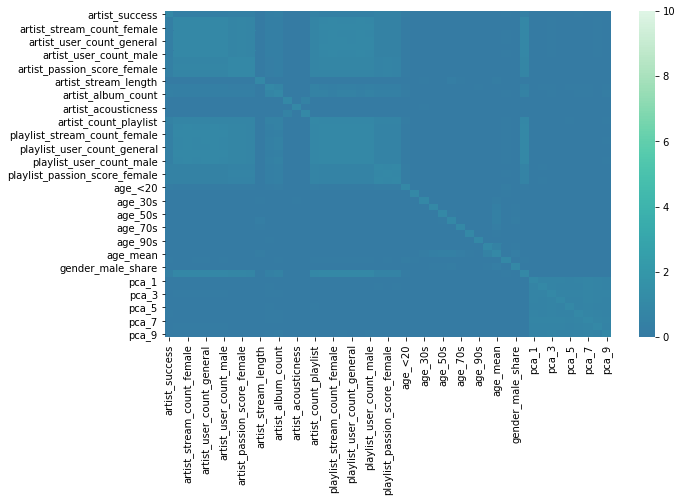

In [176]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_combined.corr(), center=0, cmap="mako", vmin=0, vmax=10)

<div class="alert alert-success">
<p>  

*Description:* We continue by clustering the correlation matrix using seaborns 'clustermap'. This allows us to directly identify highly correlated areas; imporatant step towards removing highly correlated features.
    
</p> 

</div>

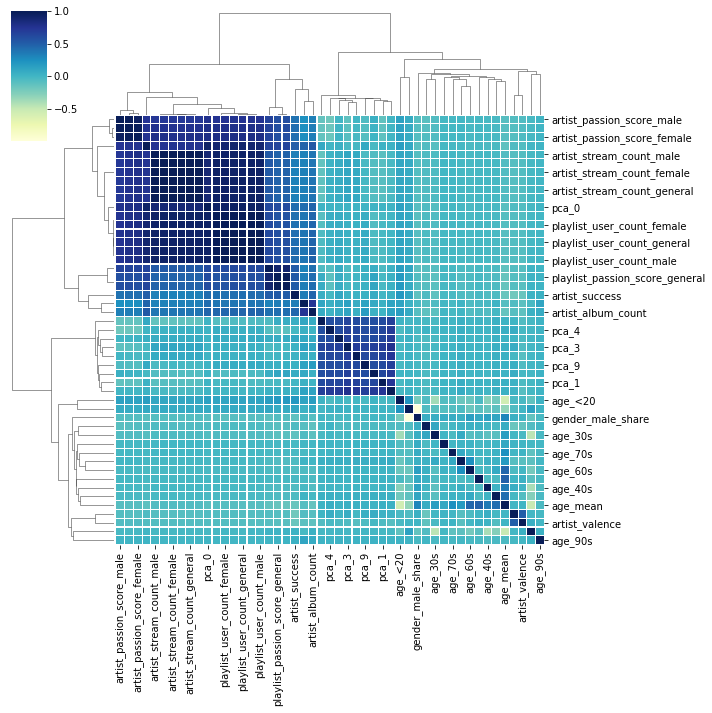

In [177]:
#clustered correlation matrix

#define correlation matrix
corr_matrix = df_combined.corr() 

#build seaborn clustermap
clustermap = sns.clustermap(corr_matrix, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(clustermap.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
clustermap

<div class="alert alert-success">
<p>  

***Insights:*** From the above matrix we are already able to draw conclusions on correlations. It appears that artist and playlist features tend to be highly correlated as well as certain pca codes.
<br>
<br>
Before we look at the exact correlation value and accordingly drop features, we first take a look at one example to further visualize the correlation (artist_user_count <> playlist_stream_count). This helps to understand the magnitude of correlation.
                
</p> 

</div>

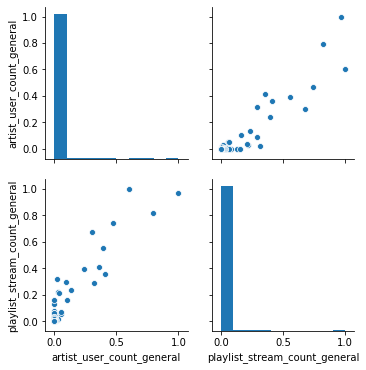

In [178]:
#visualize correlation between 'artist_user_count' and 'playlist_stream_count'
sns.pairplot(df_combined[['artist_user_count_general','playlist_stream_count_general']], palette= flatui)
plt.show()

In [179]:
#define function to get diagonal and lower triangular pairs of correlation matrix
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

#define function to get top absolute correlations from the previously defined matrix
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

<div class="alert alert-success">
<p>  

***Description:*** One can observe that various features are highly correlated (above 99%). Therefore, we have to handle these correlations. In order to get a better understanding, we decided to visualize the correlations. Since one can notice a sharp drops just below '0.95' and '0.75' (see graph below), we decided to drop all features with correlations higher than '0.75'.
                
</p> 

</div>

In [180]:
#output top absolute correlations
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_combined, 10))

Top Absolute Correlations
playlist_stream_count_female   playlist_user_count_female     0.999939
playlist_stream_count_general  playlist_user_count_general    0.999938
playlist_stream_count_male     playlist_user_count_male       0.999931
artist_stream_count_female     artist_user_count_female       0.999926
artist_stream_count_general    artist_user_count_general      0.999922
artist_stream_count_male       artist_user_count_male         0.999911
artist_stream_count_female     artist_user_count_general      0.999718
artist_stream_count_general    artist_stream_count_female     0.999656
artist_user_count_general      artist_user_count_female       0.999632
artist_stream_count_general    artist_user_count_female       0.999420
dtype: float64


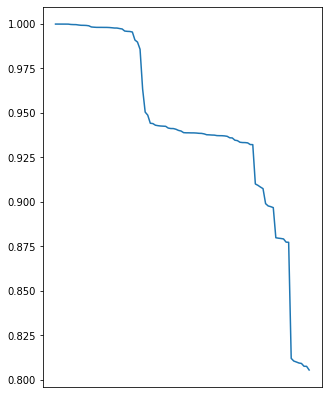

In [181]:
fig = get_top_abs_correlations(df_combined, 100)
plt.xticks([])
fig.plot(figsize=(5,7))

<div class="alert alert-success">
<p>  

***Description:*** We start by dropping 'playlist_passion_score' and 'artist_passion_score'  for both genders only leaving the combined attribute in as well as certain pca features, since all of these are highly correlated.
                
</p> 

</div>

In [182]:
#assign to new dataframe, which will be used for dropping attributes based on correlation
df_combined_corr = df_combined.corr()
df_combined_corr.shape

(49, 49)

In [183]:
#define function to drop single attributes
def drop_corr_attribute(data, attribute):
    data = data.drop(attribute, 1).drop(attribute)
    return data

In [184]:
#drop the beforementioned attributes and print the new shape of the correlation matrix

#playlist passion score feature
df_combined_corr = drop_corr_attribute(df_combined_corr, 'playlist_passion_score_female')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'playlist_passion_score_male')

#atrist passion score feature
df_combined_corr = drop_corr_attribute(df_combined_corr, 'artist_passion_score_female')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'artist_passion_score_male')

In [185]:
#drop the beforementioned 'pca' attributes and print the new shape of the correlation matrix

df_combined_corr = drop_corr_attribute(df_combined_corr, 'pca_2')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'pca_5')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'pca_4')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'pca_7')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'pca_8')

print(get_top_abs_correlations(df_combined_corr, 2))
df_combined_corr.shape

playlist_stream_count_general  playlist_user_count_general    0.999998
playlist_stream_count_female   playlist_user_count_female     0.999998
dtype: float64


(40, 40)

<div class="alert alert-success">
<p>  

***Description:***
Stepwise reduction of correlation - the methodolgy was to alwys eliminate the two highest correlated features, re-calculate the correlation and repeat the step. The was done until the correlation was below 0.80 for all remaining (and non-related to success).
    
</p> 

</div>

In [186]:
#step-wise reduction
df_combined_corr = drop_corr_attribute(df_combined_corr, 'playlist_stream_count_general')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'playlist_stream_count_female')

#re-calculate and print correlation
print(get_top_abs_correlations(df_combined_corr, 2))

#return shape to check if features were dropped
df_combined_corr.shape

playlist_stream_count_male  playlist_user_count_male    0.999998
artist_stream_count_female  artist_user_count_female    0.999997
dtype: float64


(38, 38)

In [187]:
#step-wise reduction
df_combined_corr = drop_corr_attribute(df_combined_corr, 'playlist_stream_count_male')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'artist_stream_count_female')

print(get_top_abs_correlations(df_combined_corr, 2))
df_combined_corr.shape

artist_stream_count_general  artist_user_count_general    0.999997
artist_stream_count_male     artist_user_count_male       0.999996
dtype: float64


(36, 36)

In [188]:
#step-wise reduction
df_combined_corr = drop_corr_attribute(df_combined_corr, 'artist_stream_count_male')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'artist_user_count_female')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'artist_user_count_male')

print(get_top_abs_correlations(df_combined_corr, 2))
df_combined_corr.shape

artist_stream_count_general  artist_user_count_general     0.999996
playlist_user_count_general  playlist_user_count_female    0.999919
dtype: float64


(33, 33)

In [189]:
#step-wise reduction
df_combined_corr = drop_corr_attribute(df_combined_corr, 'playlist_user_count_female')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'playlist_user_count_male')

print(get_top_abs_correlations(df_combined_corr, 2))
df_combined_corr.shape

artist_stream_count_general  artist_user_count_general    0.999995
gender_female_share          gender_male_share            0.999666
dtype: float64


(31, 31)

In [190]:
#step-wise reduction
df_combined_corr = drop_corr_attribute(df_combined_corr, 'gender_male_share')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'playlist_user_count_general')

print(get_top_abs_correlations(df_combined_corr, 2))
df_combined_corr.shape

artist_stream_count_general  artist_user_count_general    0.999995
artist_count_playlist        pca_0                        0.991977
dtype: float64


(29, 29)

In [191]:
#step-wise reduction
df_combined_corr = drop_corr_attribute(df_combined_corr, 'artist_user_count_general')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'artist_passion_score_general')

print(get_top_abs_correlations(df_combined_corr, 2))
df_combined_corr.shape

artist_count_playlist        pca_0    0.992311
artist_stream_count_general  pca_0    0.981847
dtype: float64


(27, 27)

In [192]:
#step-wise reduction
df_combined_corr = drop_corr_attribute(df_combined_corr, 'pca_0')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'pca_1')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'pca_3')
#df_combined_corr = drop_corr_attribute(df_combined_corr, 'pca_6')
#df_combined_corr = drop_corr_attribute(df_combined_corr, 'pca_9')

print(get_top_abs_correlations(df_combined_corr, 3))
df_combined_corr.shape

artist_track_count           artist_album_count                0.957073
artist_stream_count_general  artist_count_playlist             0.951415
artist_count_playlist        playlist_passion_score_general    0.918417
dtype: float64


(24, 24)

In [193]:
#step-wise reduction
df_combined_corr = drop_corr_attribute(df_combined_corr, 'artist_album_count')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'playlist_passion_score_general')
df_combined_corr = drop_corr_attribute(df_combined_corr, 'artist_count_playlist')
#df_combined_corr = drop_corr_attribute(df_combined_corr, 'artist_valence')

print(get_top_abs_correlations(df_combined_corr, 3))
df_combined_corr.shape

pca_6                pca_9             0.861338
artist_danceability  artist_valence    0.791867
age_<20              age_mean          0.738325
dtype: float64


(21, 21)

In [194]:
#final overview of correlation
print(get_top_abs_correlations(df_combined_corr, 10))

pca_6                        pca_9                          0.861338
artist_danceability          artist_valence                 0.791867
age_<20                      age_mean                       0.738325
age_20s                      age_mean                       0.680871
age_mean                     gender_female_share            0.653856
artist_success               artist_track_count             0.645170
age_60s                      age_mean                       0.631365
artist_success               artist_stream_count_general    0.621741
age_50s                      age_mean                       0.602298
artist_stream_count_general  artist_track_count             0.601220
dtype: float64


<div class="alert alert-success">
<p>  

***Description:*** 
The above table was then visualized into the clustered matrix again. The graph below showcases the 'new' correlation matrix excluding the dropped features. One can directly notive that the overall correlation was lowered drastically. We continue to investigate the features by looking at the feature importance.
    <br>
    <br>
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
                
</p> 

</div>

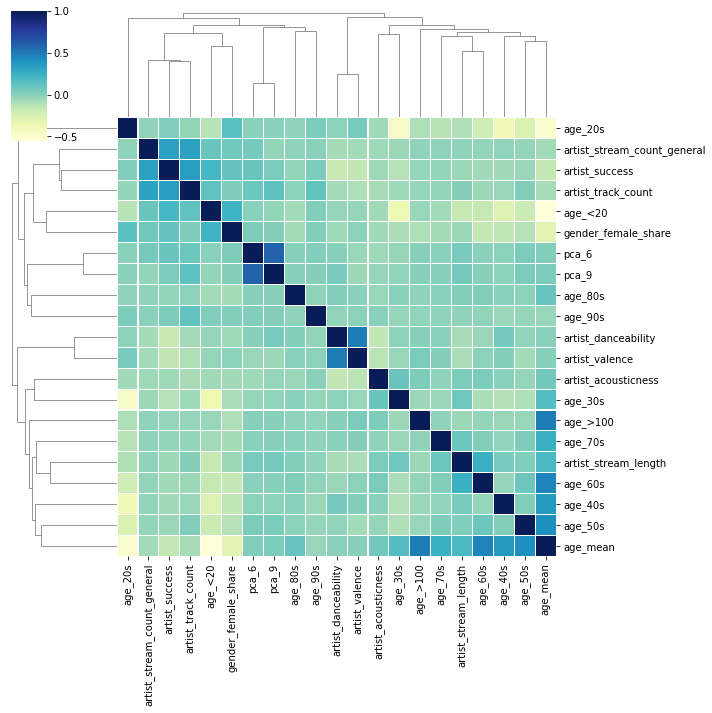

In [195]:
#clustered correlation matrix

#define correlation matrix
corr_matrix = df_combined_corr 

#build seaborn clustermap
clustermap = sns.clustermap(corr_matrix, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(clustermap.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
clustermap

<div class="alert alert-success">
<p>  

***Description:***
Since we decided to drop features in the correlation dataframe and recalculate the correlation in the setpwise reduction on the same dataframe, we now have to convert this methodology to our 'main' dataframe. Please find the according code below.
                
</p> 

</div>

In [196]:
#drop columns in 'original' dataframe; based on selected features from multi-corr

#list of remaining columns
list_combined_corr = list(df_combined_corr.columns)

#list of all orginal columns
list_combined = list(df_combined.columns)

#subtraction between the two lists: list_combined - list_combined_corr
df_combined_drop = list(set(list_combined) - set(list_combined_corr))

#delete subtraction list features from original dataframe
df_combined = df_combined.drop(df_combined_drop, axis=1)
print(df_combined.shape)

#showcase main dataframe
df_combined.head()

(639, 21)


,artist_success,artist_stream_count_general,artist_stream_length,artist_track_count,artist_danceability,artist_acousticness,artist_valence,age_<20,age_20s,age_30s,...,age_50s,age_60s,age_70s,age_80s,age_90s,age_>100,age_mean,gender_female_share,pca_6,pca_9
A BOOGIE WIT DA HOODIE,1.0,0.000000,0.170420,0.351852,0.619462,0.052496,0.535004,0.431220,0.424176,0.065647,...,0.018799,0.002809,0.000735,0.001556,0.015428,0.003976,0.102707,0.299505,0.388308,0.300189
A R I Z O N A,1.0,0.025296,0.203896,0.592593,0.668847,0.328698,0.383541,0.264019,0.476183,0.148069,...,0.029195,0.004221,0.000699,0.000466,0.018643,0.002372,0.131707,0.521963,0.788682,0.207787
ABSOFACTO,1.0,0.000000,0.209996,0.018519,0.279292,0.915680,0.213853,0.210145,0.536232,0.173913,...,0.014493,0.000000,0.000000,0.000000,0.152174,0.000000,0.131367,0.405797,0.413819,0.295637
ALL TVVINS,1.0,0.000081,0.211951,0.259259,0.621191,0.222057,0.378795,0.237308,0.478942,0.176538,...,0.024615,0.004038,0.000673,0.001923,0.006058,0.002019,0.135689,0.322149,0.411047,0.294896
AMIR,1.0,0.000000,0.201788,0.388889,0.534852,0.091825,0.502144,0.303185,0.417224,0.150610,...,0.022414,0.007865,0.000000,0.000000,0.016516,0.004719,0.133327,0.463366,0.412796,0.291655


Finally, we want to take a look out the class balance in our dependent variable.

Given the natural bias in our data, i.e. there are more cases of failure than of success in the training and test sets; there is a strong bias toward predicting ‘failure’. Based on our complete (unbalanced classes) training sample, if the model only predicted ‘failure’, we would achieve an accuracy of 88.8%. 

To give us a more even class balance, without losing too much data, we will sample data from the bigger class to achive a class balance closer to 60-40. 

There is another way to determine the accuracy of our predictions using a confusion matrix and ROC curve, but more on that later. For now, we will go ahead with sampling the bigger class:

<div class="alert alert-success">
<p>

(4) Class Balance
    --
    
Data Transformation
</p> 

</div>

In [197]:
# Class balance
p1 = df_combined[df_combined.artist_success == True]
p2 = df_combined[df_combined.artist_success == False].sample(round(len(p1)*2))
p3 = pd.concat([p1,p2])
df_sampled = p3[:]
print(df_sampled.artist_success.value_counts())

0.0    164
1.0     82
Name: artist_success, dtype: int64


In [198]:
df_sampled.head()

,artist_success,artist_stream_count_general,artist_stream_length,artist_track_count,artist_danceability,artist_acousticness,artist_valence,age_<20,age_20s,age_30s,...,age_50s,age_60s,age_70s,age_80s,age_90s,age_>100,age_mean,gender_female_share,pca_6,pca_9
A BOOGIE WIT DA HOODIE,1.0,0.000000,0.170420,0.351852,0.619462,0.052496,0.535004,0.431220,0.424176,0.065647,...,0.018799,0.002809,0.000735,0.001556,0.015428,0.003976,0.102707,0.299505,0.388308,0.300189
A R I Z O N A,1.0,0.025296,0.203896,0.592593,0.668847,0.328698,0.383541,0.264019,0.476183,0.148069,...,0.029195,0.004221,0.000699,0.000466,0.018643,0.002372,0.131707,0.521963,0.788682,0.207787
ABSOFACTO,1.0,0.000000,0.209996,0.018519,0.279292,0.915680,0.213853,0.210145,0.536232,0.173913,...,0.014493,0.000000,0.000000,0.000000,0.152174,0.000000,0.131367,0.405797,0.413819,0.295637
ALL TVVINS,1.0,0.000081,0.211951,0.259259,0.621191,0.222057,0.378795,0.237308,0.478942,0.176538,...,0.024615,0.004038,0.000673,0.001923,0.006058,0.002019,0.135689,0.322149,0.411047,0.294896
AMIR,1.0,0.000000,0.201788,0.388889,0.534852,0.091825,0.502144,0.303185,0.417224,0.150610,...,0.022414,0.007865,0.000000,0.000000,0.016516,0.004719,0.133327,0.463366,0.412796,0.291655


In [199]:
#mid-way file save
df_sampled.to_csv(r'df_sampled.csv', index = False)

----
----

# <span style="color:#1CE48C"> Evaluate alogrithms</span>
<br>
There are number of classification models available to us via the **`scikit-learn`** package, and we can rapidly experiment using each of them to find the optimal model.

Below is an outline of the steps we will take to arrive at the best model:

*	Split data into training and validation (hold-out) set
*	Use cross-validation to fit different models to training set
*	Select model with the highest cross-validation score as model of choice
*	Tune hyper parameters of chosen model.
*   Use ensemble models to combine insights from different models.
*	Test the model on hold-out set

In detail, we will vist the following steps:
1. Data Sampling
2. Explore Variety of Models
3. Spotcheck Algorithms
4. Ensemble Learning Model / Model Fine-Tuning
5. Spotcheck Neuronal Network 
6. Model Selection Summary

<div class="alert alert-success">
<p>  

*Description:*
We start by reminding us where we left of. Below we see the features (i.e., columns) of our final dataframe.
               
</p> 

</div>

In [200]:
#output our current dataframe after sampling
df_sampled.columns

Index(['artist_success', 'artist_stream_count_general', 'artist_stream_length',
       'artist_track_count', 'artist_danceability', 'artist_acousticness',
       'artist_valence', 'age_<20', 'age_20s', 'age_30s', 'age_40s', 'age_50s',
       'age_60s', 'age_70s', 'age_80s', 'age_90s', 'age_>100', 'age_mean',
       'gender_female_share', 'pca_6', 'pca_9'],
      dtype='object')

<div class="alert alert-success">
<p>

(1) Data Sampling
    --
    
Model Selection
</p> 

</div>

In [201]:
#import required library
from sklearn.model_selection import train_test_split

<div class="alert alert-success">
<p>  

***Explanation:***
As mentioned, we usually split our data into two sub-sets: training data and testing data, and fit our model on the train data, in order to make predictions on the test data.
    <br>
    <br>
Sample Datasets:
    
- Training: The actual dataset that we use to train the model (weights and biases in the case of Neural Network). The model sees and learns from this data.
- Validation: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.
               
</p> 

</div>

In [202]:
#generate training and validation datasets

#split into train and test datasets
X_train_artist, X_test_artist, y_train, y_test  = train_test_split(df_sampled,
                                                     df_sampled.artist_success, 
                                                     stratify=df_sampled.artist_success,
                                                     random_state = 42,
                                                     test_size = 0.20)

#NOTE: splitting appears to be highly sensible to random_state value

In [203]:
#required to re-asign atrists for test metrics later on
X_train = X_train_artist.drop(columns = 'artist_success')
X_test = X_test_artist.drop(columns = 'artist_success')

In [204]:
print('This results in a test set with {0} artists and respectively a train set including {1} artists.'
      .format(len(y_test),len(y_train)))

This results in a test set with 50 artists and respectively a train set including 196 artists.


<div class="alert alert-success">
<p>  

***Insights:***
As seen we derive a training dataset of 199 artists and a test dataset containing 50 artists. Please find a visual representation of this below.
               
</p> 

</div>

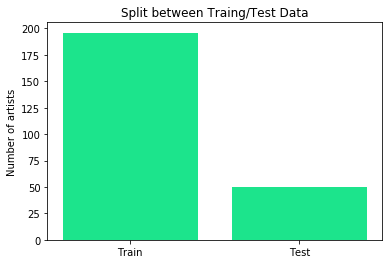

In [205]:
#bar chart visualizing training/test split

#value definitions for bar-chart
height = [len(X_train), len(X_test)]
bars = ('Train', 'Test')
y_pos = np.arange(len(bars))
 
#create bars
plt.bar(y_pos, height, color= '#1CE48C')
 
#labeling
plt.xticks(y_pos, bars)
plt.title('Split between Traing/Test Data')
plt.ylabel("Number of artists")

#show graphic
plt.show()

<div class="alert alert-success">
<p>

(2) Explore Variety of Models
    --
    
Model Selection
</p> 

</div>

<div class="alert alert-success">
<p>  

***Explanation:***
    Before building a classification model, we build a so-called'Dummy Classifier' to determine the baseline performance. This answers the question — ‘What would be the success rate of the model, if one were simply guessing?’ The below dummy classifier  will simply predict the majority class.
    <br>
    <br>
The accuracy of the model is 66%; since the model does not classify any success case correctly, the recall and precision metrics are 0.
               
</p> 

</div>

### 2.1. Dummy Classifier

In [206]:
#import required libraries for dummy classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [207]:
#Dummy Classifier

#predict 'DummyClassifier'
model = DummyClassifier(strategy= 'most_frequent')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#return evaluation metrics of dummy classifier
print('METRICS'), print('-'*10)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

METRICS
----------
Accuracy Score : 0.66
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2.2. Variety of Models

In [208]:
#import required libraries for individual models

#library for Logistic Regression
from sklearn.linear_model import LogisticRegression 
#library for Random Forrest
from sklearn.ensemble import RandomForestClassifier as RFC

#library for K-Neighbot
from sklearn.neighbors import KNeighborsClassifier
#libraries for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#libraries for GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
#libraries for Quadratic Discriminant
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#libraries for ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
#libraries for RidgeClassifier
from sklearn.linear_model import RidgeClassifier
#libraries for AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#libraries for BaggingClassifier
from sklearn.ensemble import BaggingClassifier
#libraries for GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#libraries for SVC
from sklearn.svm import SVC
#libraries for Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

#libraries for cross validation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#turn off warnings for the model output
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-success">
<p>  

***Explanation:***
After extensive research, the following models were selected for our predictive modeling task. The below dictionary shows them together. We believe that this list of models is suffiecient for our task (models discussed in class and beyond); yet not exhaustice since there are more models out there. Considering the future of this project one should consider predicting even more models. For now we start with the following.
               
</p> 

</div>

In [209]:
#dictionary of all models used within our model selection
model_dict = {'LogisticRegression':LogisticRegression,
              'RFC':RFC,
              'tree.DecisionTreeClassifier':tree.DecisionTreeClassifier,
              'ExtraTreesClassifier':ExtraTreesClassifier,
              'RidgeClassifier':RidgeClassifier,
              'KNeighborsClassifier':KNeighborsClassifier,
              'GaussianNB':GaussianNB,
              'QuadraticDiscriminantAnalysis':QuadraticDiscriminantAnalysis,
              'AdaBoostClassifier':AdaBoostClassifier,
              'BaggingClassifier':BaggingClassifier,
              'GradientBoostingClassifier':GradientBoostingClassifier,
              #New
              'Support Vector Machines':SVC,
              'Stochastic Gradient Descent':SGDClassifier
            
             }

<div class="alert alert-success">
<p>  

***Explanation:***
Started by building a generic function to test a variety of different models in fast and elegant way.
               
</p> 

</div>

In [210]:
#define generic function to apply variety of predictive models 

#inputs selected model and train/test data
def generic_model_func(model, X_train, X_test, y_train, y_test):
    name = str(model)
    var = model()
    var.fit(X_train,y_train)
    
    folds = 10
    
    #predict actual model
    y_pred = cross_val_predict(var, X_train, y_train, cv=folds)
    
    #calculate accuracy
    acc_score_train = accuracy_score(y_train,y_pred)
    #acc_score_test = accuracy_score(y_test,var.predict(X_test))
    acc_score_test = accuracy_score(y_test,cross_val_predict(var, X_test, y_test, cv=folds))
    
    #generate X/y samples from whole dataset
    X = df_sampled.drop(columns = 'artist_success')
    y = df_sampled.artist_success
    
    #calculate cross validation scores
    cv = cross_val_score(var, X, y, cv=folds)
    avg_cv = cv.mean()
    sd_cv = np.std(cv)
    
    #calculate further model metrics
    precision = precision_score(y_train,y_pred)
    recall = recall_score(y_train,y_pred)
    f1 = f1_score(y_train,y_pred)
    
    #put together output dataframe
    data = [[name, acc_score_train, acc_score_test,
             precision, recall, f1,
             avg_cv, sd_cv, cv]]
    
    res = pd.DataFrame(data, columns=['Model','Train Accuracy Score','Test Accuracy Score',
                                      'Precision Score', 'Recall Score', 'F1 Score',
                                      'CV (avgerage)', 'CV (sd. deviation)', 'CV'])

    return res

<div class="alert alert-success">
<p>

(3) Spotcheck Algorithms
    --
    
Model Selection
</p> 

</div>

<div class="alert alert-success">
<p>  

***Insights:***
The output dataframe includes all of our predicted models and combines different evaluation metrics for each model (i.e., accuracy, precision, recall, CV score, ...). This ultimately allows us to chose our go-to model for the following analysis.
    <br>
    <br>
Based on best parctices we continue to rank models according to the highest cross-validation score. Therefore, our model of choice is the 'Random Forrest Classifier'. Please note that there appears to be changes in the range of +/- 2% for each model; after multiple runs RFC proofed to score high most consistently. Further, RFC appears to have the lowest standard deviation.
    
</p> 

</div>

In [266]:
#comparison of model performance in one comprehensive dataframe

#set df columns as base
df_models = pd.DataFrame(columns=['Model','Train Accuracy Score','Test Accuracy Score',
                                  'Precision Score', 'Recall Score', 'F1 Score',
                                  'CV (avgerage)', 'CV (sd. deviation)', 'CV'])

#loop through all outlined models
for i in model_dict:
    #apply function to generate test/train accuracy and CV scores
    df_add = generic_model_func(model_dict[i], X_train, X_test, y_train, y_test)
    df_models = df_models.append(df_add)

#adjust and return daraframe output
df_models['Model'] = df_models['Model'].str.slice(16,-2)
df_models.set_index(['Model'], inplace=True)
df_models

,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,F1 Score,CV (avgerage),CV (sd. deviation),CV
Model,,,,,,,,
linear_model._logistic.LogisticRegression,0.770408,0.72,0.812500,0.400000,0.536082,0.772833,0.068961,"[0.76, 0.64, 0.76, 0.72, 0.88, 0.76, 0.75, 0.8..."
ensemble._forest.RandomForestClassifier,0.933673,0.82,0.906250,0.892308,0.899225,0.927000,0.056405,"[0.84, 0.84, 0.96, 0.96, 1.0, 0.92, 0.95833333..."
tree._classes.DecisionTreeClassifier,0.913265,0.84,0.852941,0.892308,0.872180,0.857500,0.063163,"[0.8, 0.88, 0.84, 0.92, 1.0, 0.76, 0.833333333..."
ensemble._forest.ExtraTreesClassifier,0.887755,0.86,0.830769,0.830769,0.830769,0.882333,0.057755,"[0.84, 0.8, 0.92, 0.84, 1.0, 0.84, 0.833333333..."
linear_model._ridge.RidgeClassifier,0.780612,0.74,0.823529,0.430769,0.565657,0.780833,0.076472,"[0.76, 0.64, 0.8, 0.72, 0.88, 0.8, 0.75, 0.875..."
neighbors._classification.KNeighborsClassifier,0.785714,0.78,0.661972,0.723077,0.691176,0.756833,0.100287,"[0.72, 0.64, 0.84, 0.72, 0.88, 0.56, 0.8333333..."
naive_bayes.GaussianNB,0.857143,0.82,0.717647,0.938462,0.813333,0.821500,0.141173,"[0.64, 0.84, 0.88, 1.0, 0.96, 0.52, 0.79166666..."
discriminant_analysis.QuadraticDiscriminantAnalysis,0.668367,0.66,0.000000,0.000000,0.000000,0.666667,0.014606,"[0.64, 0.64, 0.68, 0.68, 0.68, 0.68, 0.6666666..."
ensemble._weight_boosting.AdaBoostClassifier,0.918367,0.76,0.876923,0.876923,0.876923,0.890167,0.070724,"[0.88, 0.92, 0.88, 0.96, 0.96, 0.76, 1.0, 0.87..."


<div class="alert alert-success">
<p>  

***Insights:***
The following five models appear to perform best (measured by model metrics in table above) and consistantly result in high predictive scores. Please note that during the duration of this week the models were run quite often which allows for this conclusion.
- Random Forrest
- DecisionTree   
- GaussianNB 
- Bagging
- Boosting
</p> 

</div>

<div class="alert alert-success">
<p>  

***Insights:***
The below boxplot compares the CV scores of the five best performing models from before. It appears that the trees and GaussianNB have the best scores, with RandomForrestClassifier resulting in the highest average CV score. As seen in the table above RFC also has one of the lowest standard deviations.
<br>
<br>
These boxplots further support our model selection process and again indicate that RFC should be our model of choice.
    
</p> 

</div>

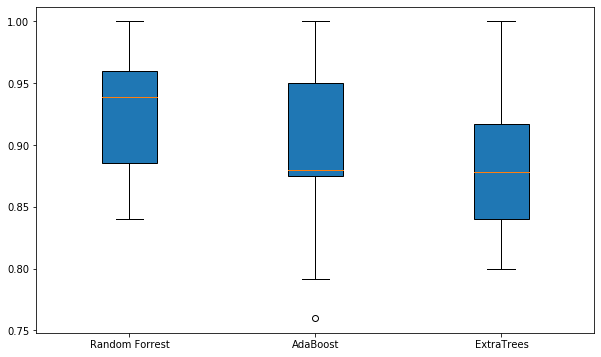

In [267]:
#boxplot of Cross-Validation for different models

#set values for boxplot as cross value scores from above dataframe
value1 = df_models['CV'].iloc[1]  #RFC
value2 = df_models['CV'].iloc[8]  #AdaBoost
value3 = df_models['CV'].iloc[3]  #ExtraTrees

#plot data into boxplot
figure(figsize=(10, 6))
box_plot_data=[value1,value2,value3]
plt.boxplot(box_plot_data,patch_artist=True,labels=['Random Forrest','AdaBoost',
                                                    'ExtraTrees'])


plt.show()

<div class="alert alert-success">
<p>  

***Note:***
Further analyisis would allow to check voting or stacking algorithms for multiple combined models. At this stage of the course and outlines task we decided to stick with one model which will be optimized/ fine-tuned in the following steps.    
</p> 

</div>

<div class="alert alert-success">
<p>

(4) Ensemble Learning Model
    --
    
Model Selection
</p> 

</div>

<div class="alert alert-success">
<p>  

***Description:***
Ensemble learning uses multiple machine learning models to try to make better predictions on a dataset. An ensemble model works by training different models on a dataset and having each model make predictions individually. The predictions of these models are then combined in the ensemble model to make a final prediction.   
</p> 

</div>

In [268]:
from sklearn.model_selection import GridSearchCV 

<div class="alert alert-success">
<p>  

***Note:***
At this stage we are aiming to fine-tune our chosen model; this would also allow to fine-tune multiple models and select the best one afterwards. However, following the task structure and limited computing power (focus: GridSearch) we decided to stick to one model resulting from the above section and optimize only this one model.
    
</p> 

</div>

In [269]:
#define function to fit models for ensemble
def model_fit_ensemble(model, param_grid, folds):
    model_gs = GridSearchCV(model, param_grid, cv=folds)
    
    #fit model to training data
    model_gs.fit(X_train, y_train)

    #save best model
    model_best = model_gs.best_estimator_

    y_pred = cross_val_predict(model_best, X_train, y_train, cv=folds)

    model_precision = precision_score(y_train,y_pred)
    model_recall = recall_score(y_train,y_pred)
    model_f1 = f1_score(y_train,y_pred)

    #output scores
    print('Precision: ', model_precision, ', Recall: ', model_recall, ', F1: ', model_f1)
    
    return model_best

<div class="alert alert-success">
<p>  

***Explanation:***
For the Random Forrest Classifier we check all available parameters for modification. Based on bets practices we decided to optimize:
- n_estimators
- max_features
- max_depth
 
</p> 

</div>

### 4.1. Ensemble 1. Model: Random Forrest Classifier

In [270]:
model = RFC()
param_grid = [{'n_estimators': [200,250,300,350,400], 'max_features': ['auto'], 'max_depth': [30,50,70]}]
folds = 5

#save best model for RFC
rfc_best = model_fit_ensemble(model, param_grid, folds)

Precision:  0.9047619047619048 , Recall:  0.8769230769230769 , F1:  0.890625


<div class="alert alert-success">
<p>  

***Insights:*** 
The below case model will be retrained 75 times.
    <br> 
    = 5x(n_estimator) * 1x(max_features) * 3x(max_depth) * 5x(cv runs) = 75 
    
</p> 

</div>

### 4.2. Ensemble 2. Model: Ada Boost Classifier

In [320]:
model = AdaBoostClassifier()
param_grid = [{'n_estimators': [200,250,300]}]
folds = 5

#save best model for RFC
abc_best = model_fit_ensemble(model, param_grid, folds)

Precision:  0.8923076923076924 , Recall:  0.8923076923076924 , F1:  0.8923076923076924


### 4.3. Ensemble 3. Model: Extra Trees Classifier

In [321]:
model = ExtraTreesClassifier()
param_grid = [{'n_estimators': [200,250,300], 'max_depth': [30,50,70]}]
folds = 5

#save best model for RFC
etc_best = model_fit_ensemble(model, param_grid, folds)

Precision:  0.8636363636363636 , Recall:  0.8769230769230769 , F1:  0.8702290076335878


### 4.4. Voting Classifier

In [322]:
from sklearn.ensemble import VotingClassifier

#create a dictionary of our models

voting_clf=[('rfc', rfc_best), ('abc', abc_best), ('etc', etc_best)]
#create our voting classifier, inputting our models
voting_clf = VotingClassifier(voting_clf, voting='soft')

#fit model to training data
voting_clf.fit(X_train, y_train)

#save best model
voting_best = voting_clf

In [323]:
#accuracy scores for all models within ensemble 
print('-'*5,'Accuracy Scores','-'*5)

for clf in (rfc_best, abc_best, etc_best, voting_best):
    y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
    print(clf.__class__.__name__, accuracy_score(y_train,y_pred))

----- Accuracy Scores -----
RandomForestClassifier 0.9285714285714286
AdaBoostClassifier 0.9285714285714286
ExtraTreesClassifier 0.9081632653061225
VotingClassifier 0.9183673469387755


<div class="alert alert-success">
<p>  

***Insights:***
Our ensemble model performed better than our individual models! We’ve now built an ensemble model to combine individual models.
    
</p> 

</div>

In [324]:
#further metrics for ensamble voting classifier 
print('-'*5,'Voting Classifier','-'*5)

print('precision_score ', precision_score(y_train,y_pred))
print('recall_score ', recall_score(y_train,y_pred))
print('f1_score ', f1_score(y_train,y_pred))

----- Voting Classifier -----
precision_score  0.8769230769230769
recall_score  0.8769230769230769
f1_score  0.8769230769230769


### 4.5. Percision and Recall

<div class="alert alert-success">
<p>  

***Explanation:***
Precision and recall are two extremely important model evaluation metrics. While precision refers to the percentage of your results which are relevant, recall refers to the percentage of total relevant results correctly classified by your algorithm. Unfortunately, it is not possible to maximize both these metrics at the same time, as one comes at the cost of another. For simplicity, there is another metric available, called F-1 score, which is a harmonic mean of precision and recall.
    <br>
    <br>
Used Resources (non-exhaustive):
- LINK: https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
    
</p> 

</div>

In [276]:
from sklearn.metrics import precision_recall_curve

In [277]:
#score that gives the probability [0,1] that each sample belongs to class 1
y_scores = voting_best.predict_proba(X_test)[::,1]

In [278]:
#generate the precision recall curve
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [279]:
#function to visualize relationship between precision/recall
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

<div class="alert alert-success">
<p>  

***Insights:***
One way to view the tradeoff between precision and recall is to plot them together as a function of the decision threshold. This is pretty intuitive. If you have to recall everything, you will have to keep generating results which are not accurate, hence lowering your precision.
    
</p> 

</div>

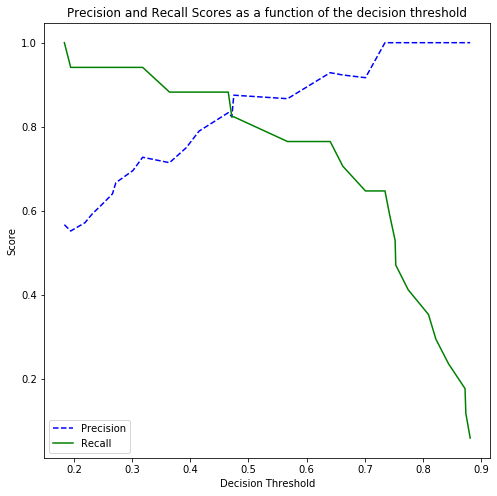

In [280]:
#plot percision/recall - to evaluate threshold
plot_precision_recall_vs_threshold(p, r, thresholds)

<div class="alert alert-success">
<p>

(5) Spotcheck Neuronal Network 
    --
    
Model Selection
</p> 

</div>

In [281]:
#import required library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

In [282]:
#Changing pandas dataframe to numpy array
X_n = df_sampled.iloc[:,1:21].values
y_n = df_sampled.iloc[:,:1].values

In [283]:
ohe = OneHotEncoder()
y_n = ohe.fit_transform(y_n).toarray()
print('One hot encoded array:')
print(y_n[0:1])

One hot encoded array:
[[0. 1.]]


In [284]:
#Train test split of model
from sklearn.model_selection import train_test_split
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(X_n,y_n,test_size = 0.2,random_state = 0)

In [285]:
model = keras.models.Sequential()
model.add(Dense(4, input_dim=20, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [286]:
#To visualize neural network
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 84        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 94
Trainable params: 94
Non-trainable params: 0
_________________________________________________________________


In [287]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer="sgd", metrics=['accuracy']) #optimizer='adam' #keras.optimizer.SGD(lr=1e-3)

In [288]:
history = model.fit(X_train_n, y_train_n, epochs=80, batch_size=32, validation_data=(X_test_n, y_test_n))

Train on 196 samples, validate on 50 samples
Epoch 1/80
196/196 [==============================] - 0s 520us/sample - loss: 0.7988 - acc: 0.3469 - val_loss: 0.8242 - val_acc: 0.2800
Epoch 2/80
196/196 [==============================] - 0s 47us/sample - loss: 0.7780 - acc: 0.3520 - val_loss: 0.8027 - val_acc: 0.3000
Epoch 3/80
196/196 [==============================] - 0s 46us/sample - loss: 0.7627 - acc: 0.3520 - val_loss: 0.7842 - val_acc: 0.3000
Epoch 4/80
196/196 [==============================] - 0s 44us/sample - loss: 0.7494 - acc: 0.3520 - val_loss: 0.7659 - val_acc: 0.2800
Epoch 5/80
196/196 [==============================] - 0s 46us/sample - loss: 0.7365 - acc: 0.3622 - val_loss: 0.7501 - val_acc: 0.2600
Epoch 6/80
196/196 [==============================] - 0s 45us/sample - loss: 0.7256 - acc: 0.3622 - val_loss: 0.7365 - val_acc: 0.2600
Epoch 7/80
196/196 [==============================] - 0s 46us/sample - loss: 0.7164 - acc: 0.3265 - val_loss: 0.7265 - val_acc: 0.2800
Epoch 8/8

Epoch 61/80
196/196 [==============================] - 0s 41us/sample - loss: 0.6433 - acc: 0.6531 - val_loss: 0.6077 - val_acc: 0.7200
Epoch 62/80
196/196 [==============================] - 0s 43us/sample - loss: 0.6432 - acc: 0.6531 - val_loss: 0.6073 - val_acc: 0.7200
Epoch 63/80
196/196 [==============================] - 0s 42us/sample - loss: 0.6431 - acc: 0.6531 - val_loss: 0.6065 - val_acc: 0.7200
Epoch 64/80
196/196 [==============================] - 0s 42us/sample - loss: 0.6429 - acc: 0.6531 - val_loss: 0.6061 - val_acc: 0.7200
Epoch 65/80
196/196 [==============================] - 0s 43us/sample - loss: 0.6428 - acc: 0.6531 - val_loss: 0.6062 - val_acc: 0.7200
Epoch 66/80
196/196 [==============================] - 0s 41us/sample - loss: 0.6428 - acc: 0.6531 - val_loss: 0.6059 - val_acc: 0.7200
Epoch 67/80
196/196 [==============================] - 0s 42us/sample - loss: 0.6427 - acc: 0.6531 - val_loss: 0.6060 - val_acc: 0.7200
Epoch 68/80
196/196 [===========================

In [289]:
y_pred_n = model.predict(X_test_n)
#Converting predictions to label
pred_n = list()
for i in range(len(y_pred_n)):
    pred_n.append(np.argmax(y_pred_n[i]))

In [290]:
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test_n)):
    test.append(np.argmax(y_test_n[i]))

In [291]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred_n,test)
print('Accuracy is:', a*100)

Accuracy is: 72.0


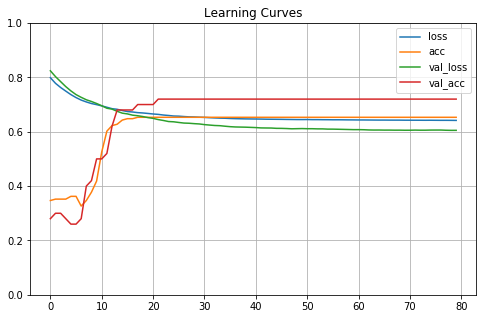

In [292]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.title("Learning Curves")
plt.show()

<div class="alert alert-success">
<p>  

***Insights:***
We can see that the training and the test accuracy increase during the training, while the training loss and validation loss decrease. However, the model performs porer than our voting classifier and most of our other classifiers from the step above. Hence, we will neglect the neuronal network.
</p> 

</div>

<div class="alert alert-success">
<p>

(6) Model Selection Summary
    --
    
Model Selection
</p> 

</div>

<div class="alert alert-success">
<p>  

***Insights:***
Based on the previous steps outlined of the 'Model Selection' (i.e., selection, optimization, ...) we derive the below final model, which we will use in during the further analysis.

</p> 

</div>

In [293]:
#re-asign and output final model for further analysis
finalmodel = voting_best

##### Save Model

In [294]:
#import required libraries
import pickle

In [295]:
##save finalized model
filename = 'finalmodel.sav'
pickle.dump(finalmodel, open(filename, 'wb'))

# <span style="color:#1CE48C"> Algorithm Results</span>
<br>
Now that we have grasped a sense of the alogorithm evaluation we will continue to discuss the results w/ looking at some evaluation approaches.

The following  will be covered in this section:
1. Confusions Matrix
2. Further Model Metrics (e.g., Percision, Recall, etc.)
3. ROC Curve
4. Model Performance
5. Feature Importance Analysis


<div class="alert alert-success">
<p>

(1) Confusion Matrix
    --
    
Algorithm Results
</p> 

</div>

<div class="alert alert-success">
<p>  

***Explanation:***
To get a better idea of the quality of our predictions, we can plot a confusion matrix and ROC curve.
A confusion matrix is a technique for summarizing the performance of a classification algorithm that allows visualization of the performance of an algorithm.
Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).
The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.
    
</p> 

</div>

In [296]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [297]:
#import required library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import scikitplot as skplt

<div class="alert alert-success">
<p>  

***Explanation:***
What actually is the confusion matrix? Well, it is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values (see output structure below).
    <br>
    <br>
Thereby, we describe predicted values as Positive and Negative and actual values as True and False.
    <br>
    <br>
Used resources: 
- LINK: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
</p> 

</div>

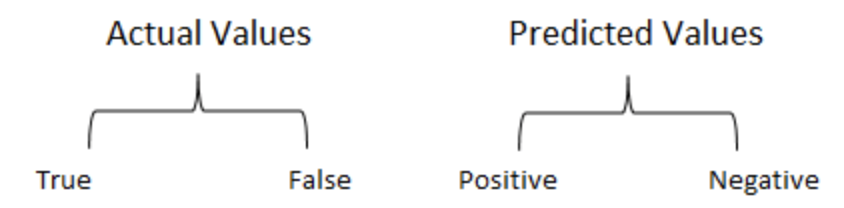

In [298]:
display(Image(filename='./GRAPHICS/CF_explain.png', width=400, height=40))

<div class="alert alert-success">
<p>  

***Explanation:***
How does one confusion matrix actually look? Based on the above defined terminology we gain the following ouput. This will be extremely useful for measuring Recall, Precision, Accuracy and most importantly ROC Curve later on.
    
</p> 

</div>

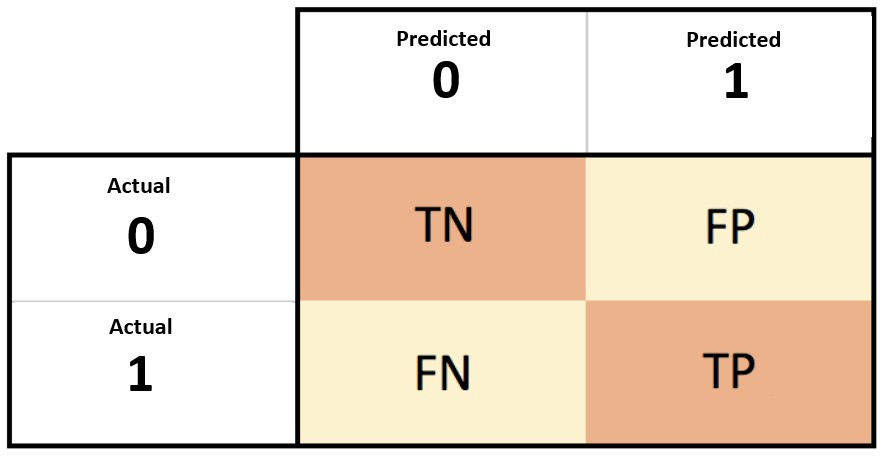

In [299]:
display(Image(filename='./GRAPHICS/CF_Matrix.jpeg', width=300, height=60))

In [300]:
#basic confusion matrix

#define y_pred based on previously selected model
y_pred = cross_val_predict(finalmodel, X_test, y_test, cv=10)

#define x_true
y_true = X_test_artist.artist_success
y_true = y_true.to_numpy()

#output confusion matrix (in actual artists)
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_pred, y_true), index=['Actual: No Success','Actual: Success'],
                                   columns=['Predicted: No Success','Predicted: Success'])
print('Confusion Matrix: ','\n', df_confusion_matrix)

Confusion Matrix:  
                     Predicted: No Success  Predicted: Success
Actual: No Success                     31                   5
Actual: Success                         2                  12


<div class="alert alert-success">
<p>  

***Explanation:***
Following the outlines structure of the confusion matrix it is obvious that we want to achieve as few 'False Negatives'(FN) & 'False Positives' (FP) as possible since these indicate false predictions.
<br>
<br>
What is worse FN or FP? Let's illustrate that on a real-life example: FN for cancer; someone would get the result that he/she does not have cancer, while they actually do. For us the analogy would be that the artist will be unsuccesful while he/she will actually be successful (or vice versa).
    
</p> 

</div>

<div class="alert alert-success">
<p>  

***Insights:***
Depending on our goal either one (FN or FP) should be minimized. If we assume to be a label signing new artists, we invest in predicted rising stars. Hence, if an artist is predicted to be succesful and turns out not be costs us a lot of money - therefore, False Positives would be worse.
    <br>
    <br>
In our case (view results above), both rates are comparably low.
    
</p> 

</div>

In [301]:
#confusion matrix with percentage values (normalized)
df_confusion_matrix_per = df_confusion_matrix.astype('float') / df_confusion_matrix.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix (in %): ','\n', df_confusion_matrix_per)

Confusion Matrix (in %):  
                     Predicted: No Success  Predicted: Success
Actual: No Success               0.861111            0.138889
Actual: Success                  0.142857            0.857143


<div class="alert alert-success">
<p>  

***Insights:***
As seen above, with real values the normalized confusion matrix indicates that we are able to predict 'no success' with a rate above 90% and success roughly 3/4 of times. 
    
</p> 

</div>

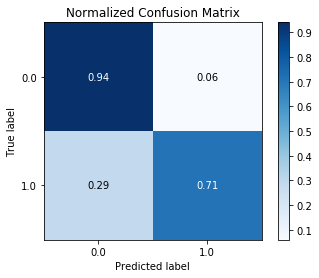

In [302]:
#plot normalized confusion matrix
skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=True)
plt.show()

<div class="alert alert-success">
<p>

(2) Further Model Metrics (e.g., Percision, Recall, etc.)
    --
    
Algorithm Results
</p> 

</div>

<div class="alert alert-success">
<p>  

***Explanation:***
- Precision is defined as the number of true positives (TP) over the number of true positives (TP) plus the number of false positives (FP).
- Recall is defined as the number of true positives (TP) over the number of true positives (TP) plus the number of false negatives (FN).
    
</p> 

</div>

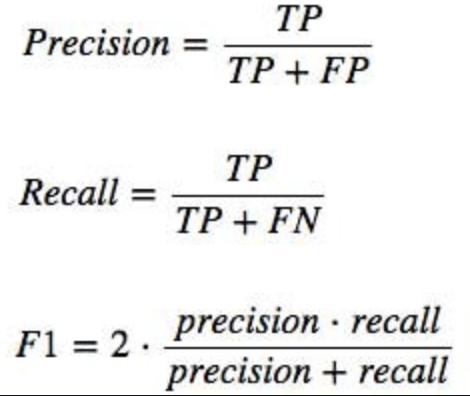

In [303]:
display(Image(filename='./GRAPHICS/Formula_P_R_F1.png', width=200, height=40))

In [304]:
#count of binary confusion matrix outcomes
TP = df_confusion_matrix.iloc[1][1]
TN = df_confusion_matrix.iloc[0][0]
FP = df_confusion_matrix.iloc[0][1]
FN = df_confusion_matrix.iloc[1][0]

#retunr values
print('True Positives:', TP), print('True Negatives:', TN),
print('False Positives:', FP), print('False Negatives:', FN)

True Positives: 12
True Negatives: 31
False Positives: 5
False Negatives: 2


(None, None)

In [305]:
#calculate further model metrics

# precision tp / (tp + fp)
precision = precision_score(y_true, y_pred)

# recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, y_pred)

#output outlined model metrics
print('MODEL METRICS'), print('-'*10)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

MODEL METRICS
----------
Precision: 0.857143
Recall: 0.705882
F1 score: 0.774194


<div class="alert alert-success">
<p>  

***Insights:***
While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.
    <br>
    <br>
We continue by visualizing the relationship between percision and recall.
    <br>
    <br>
Some resources used in the process: 
- LINK: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py
- LINK: http://index-of.es/Varios-2/Hands%20on%20Machine%20Learning%20with%20Scikit%20Learn%20and%20Tensorflow.pdf
</p> 

</div>

In [306]:
#calculate average percision score
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.71


Text(0.5, 1.0, '2-class Precision-Recall curve')

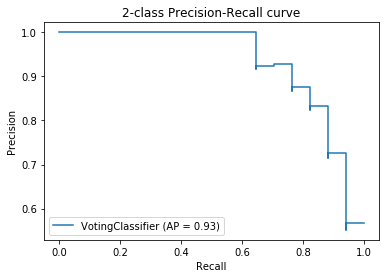

In [307]:
#plor percision score
disp = plot_precision_recall_curve(finalmodel, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

<div class="alert alert-success">
<p>

(3) ROC Curve
    --
    
Algorithm Results
</p> 

</div>

Receiver Operating Characteristic (ROC) curves show the ability of the model to classify subjects correctly across a range of decision thresholds, i.e. it plots the True Positive Rate vs. False Positive Rate at every probability threshold. 

The AUC summarizes the results of an ROC – it is the probability that a randomly chosen ‘success’ example has a higher probability of being a success than a randomly chosen ‘failure’ example. A random classification would yield an AUC of 0.5, and a perfectly accurate one would yield 1.


### 3.1. ROC Curve for Random Forrest

In [308]:
#import further libraries
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [309]:
#define function to plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1.05, -0.01, 1.05])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)

<div class="alert alert-success">
<p>  

***Explanation:***
The ROC curve features true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.
    <br>
    <br>
Before starting this part, we studied some basig online literature to get a better understanding. Some resources used:
- LINK: http://index-of.es/Varios-2/Hands%20on%20Machine%20Learning%20with%20Scikit%20Learn%20and%20Tensorflow.pdf
- LINK: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- LINK: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3755824/

</p> 

</div>

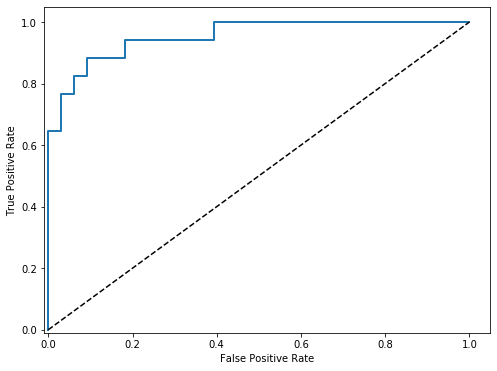

In [310]:
#plot ROC curve

#calculate prediction probability
y_pred_proba = finalmodel.predict_proba(X_test)[::,1]
#set true and false predictions
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

#plot actual graph
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [311]:
#calculate auc
auc_rfc = metrics.roc_auc_score(y_test, y_pred_proba)
auc_rfc

0.9536541889483066

<div class="alert alert-success">
<p>  

***Explanation:***
One notices that the ROC curve for our final model as kinks. Kinks are problems in how the data was collected and not in the ability of the model to perform. Therefore, they are not to worry about at this stage.

</p> 

</div>

### 3.2. ROC Curve Comparison for Benchmark

In [312]:
#prep. for comparison ROC curve (LogisticRegression as comparison)
var = LogisticRegression()
var.fit(X_train,y_train)
y_probas_logreg = cross_val_predict(var, X_train, y_train, cv=3, method="predict_proba")
y_pred_proba_logreg = var.predict_proba(X_test)[::,1]

y_scores_logreg = y_probas_logreg[:, 1] # score = proba of positive class
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_train, y_scores_logreg)

<div class="alert alert-success">
<p>  

***Insights:***
The ROC curve confirms the previously gained results. As expected from the accuracy calculated before, the RandomForrest performs well; especially when compared to other model (e.g., LogisticRegression - see below). The ROC curve for RFC approximately approaches the optimum (TP=1; FP=0) with a rather steep increase - the bottom line is that this model appears to perfrom well. 
    
</p> 

</div>

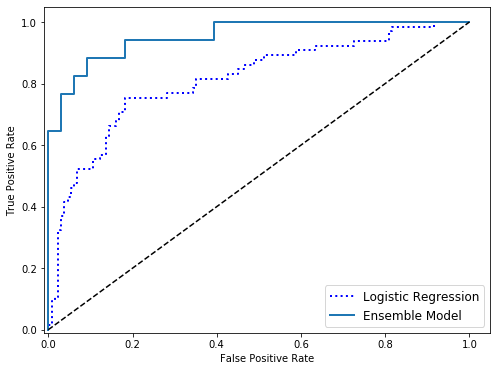

In [313]:
#plot comparison ROC courve (choosen model against logistic regression)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, "b:", linewidth=2, label = "Logistic Regression")
plot_roc_curve(fpr, tpr, "Ensemble Model")
plt.legend(loc="lower right", fontsize=12)
plt.show()

<div class="alert alert-success">
<p>  

***Explanation:***
Area under the curve (AUC) tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between success and no success.
    
</p> 

</div>

In [314]:
#calculate auc for logreg
auc_logreg = metrics.roc_auc_score(y_test, y_pred_proba_logreg)

#return AUC scores
print('AREA UNDER CURVE (AUC)'), print('-'*10)
print('RFC: ', auc_rfc)
print('LogReg: ', auc_logreg)

AREA UNDER CURVE (AUC)
----------
RFC:  0.9536541889483066
LogReg:  0.8520499108734403


<div class="alert alert-success">
<p>  

***Insights:***
When calculating the area under the curve (AUC) for both Random Forrest and Logistic Regression, we can not only prove the better performance visualy (see ROC above), we can also quantitatvely prove the results. AUC for Random Forrest Calssifier is higher.
    
</p> 

</div>

<div class="alert alert-success">
<p>

(4) Model Performance
    --
    
Algorithm Results
</p> 

</div>

<div class="alert alert-success">
<p>  

***Recap:*** 
Let's shortly outline what we have done in section '5. Present Results'. First, we clarfified and defined our potential four outomes for classification.
    <br>
<br>
Four Outcomes of Binary Classification:
- True positives (TP): data points labeled as positive that are actually positive
- False positives (FP): data points labeled as positive that are actually negative
- True negatives (TN): data points labeled as negative that are actually negative
- False negatives (FN): data points labeled as negative that are actually positive
 
Recall and Precision Metrics:
- Recall: ability of a classification model to identify all relevant instances
- Precision: ability of a classification model to return only relevant instances
- F1 score: single metric that combines recall and precision using the harmonic mean

Visualizing Recall and Precision
- Confusion matrix: shows the actual and predicted labels from a classification problem
- Receiver operating characteristic (ROC) curve: plots the true positive rate (TPR) versus the false positive rate (FPR) as a function of the model’s threshold for classifying a positive
- Area under curve (AUC): metric to calculate the overall performance of a classification model based on area under the ROC curve
    
</p> 

</div>

##### Confusion Matrix

<div class="alert alert-success">
<p>  

***Insights:***
Our prediction for success / no success is already at a high level. However, our model in the current state often classifies False Negatives (FN) for success; however, since - as outlines - we aim to keep FPs low this tradeoff between recall and precision seems accepctable.
    
</p> 

</div>

##### ROC curve

<div class="alert alert-success">
<p>  

***Explanation:***
The below graph indicates a theoretical ROC curve for a given model. Focus is on 'd' the distance to TP=1 & FP = 0. This distance should be minimal in order to the model to classify with a high acuracy.
    
</p> 

</div>

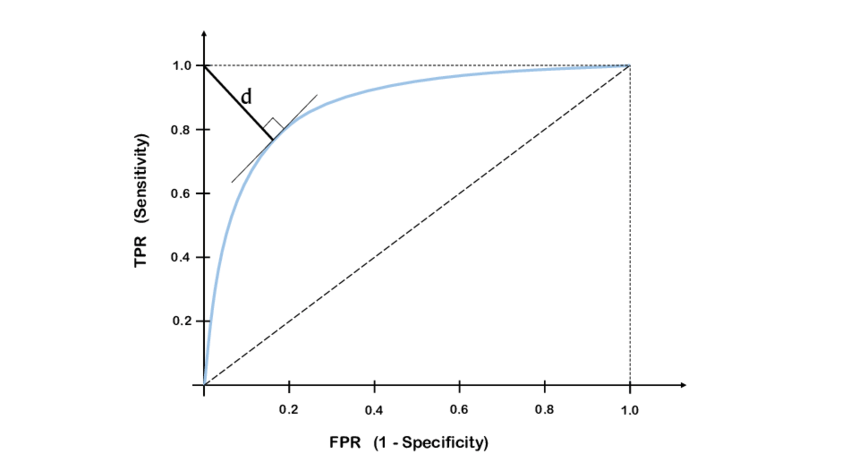

In [315]:
display(Image(filename='./GRAPHICS/Optimal_ROC_Curve.png', width=500, height=90))

<div class="alert alert-success">
<p>  

***Insights:***
While our RFC model performs comparably good when comparing with the other models tested on our dataset, it still has room for improvments. Therefore, our aim shoudl be to further reduce the distance and hence make the AUC greater.   

</p> 

</div>

Now that you have a validated model, we can potentially analyze the features of the model, to understand which ones have had the most impact on predicting an artist’s success. 

To do this, we can plot the feature importance as determined by the classifier:

<div class="alert alert-success">
<p>

(5) Feature Importance Analysis
    --
    
Algorithm Results
</p> 

</div>

<div class="alert alert-success">
<p>  

***Explanation:***
Decision trees make splits that maximize the decrese in impurity. By calculating the mean decrease for each feature across all trees we can know that feature's importance.
    
</p> 

</div>

In [316]:
#get feature importance 
feature_importances = list(rfc_best.feature_importances_)

#get attribute/feature names
attributes = df_sampled.drop('artist_success',axis=1).columns

#sort feature names according to importance
feature_importances, attributes = zip(*sorted(zip(feature_importances, attributes), reverse=True))

<div class="alert alert-success">
<p>  

Let's look at the feature imporatnce in detail. One can notice the following clusters of features:

- Age Groups (largest portion)
- PCA
- Gender Share
- Artist Features

Given the rather narrow scope of the project there is much more room to expand on attribute creation; which after multi-correlation check will potentially be included in the final model.
</p> 

</div>

<div class="alert alert-success">
<p>  

***Insights:***
The most important feature (by far) appears to be 'artist_stream_count_general' which indicates the stream count per artist for both genders. As we will see later on, this feature is crucial for our model prediction. Additioanlly, one has to point out 'artist_success_before2016' - the importance of this feature is surprisingly low (see table below).
    
</p> 

</div>

In [317]:
#output feature and according feature importance
print('FEATURE IMPORTANCE'), print('-'*10)
for i in range(18):
    print(attributes[i], ' ', feature_importances[i])

FEATURE IMPORTANCE
----------
artist_stream_count_general   0.21567018647291497
age_80s   0.12007833748066797
age_70s   0.10267673090101369
age_>100   0.09491613956730287
age_90s   0.09100187141663212
pca_6   0.05262549178605154
age_60s   0.04777406312374869
pca_9   0.04078152022835618
age_<20   0.03450789644104383
age_50s   0.033193606092909056
age_mean   0.02095350646195437
artist_track_count   0.01976738432814209
artist_valence   0.01862275781660901
artist_danceability   0.018451444472869314
age_40s   0.017961935324029423
gender_female_share   0.017023061880280993
artist_acousticness   0.014906733341113703
age_20s   0.014075766692979106


In [318]:
#calculate average feature importance
avg_feature_importances = round(np.mean(feature_importances),2)

<div class="alert alert-success">
<p>  

***Insights:***
It appears that age groups are very important to our model. Even more interesting is that 'higher' age groups above 70 years have a high feature importance. One reason to exlain could be that artists that reach this age groups will be successful or not (e.g., as soon as even eldery people starting listing to music it is main-stream and therefore included in the playlists).
    
</p> 

</div>

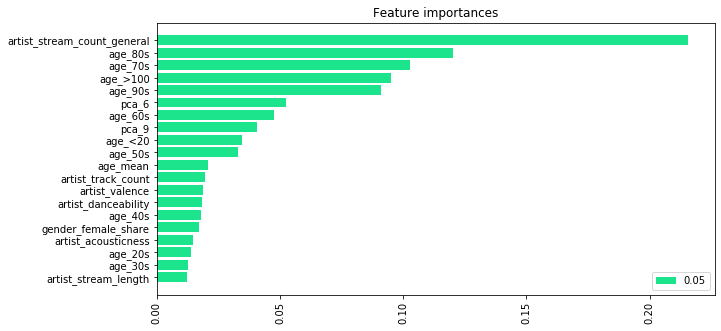

In [319]:
#visualize feature importance 
plt.figure(figsize=[10,5])
plt.title("Feature importances")

#sort feature names according to importance
feature_importances, attributes = zip(*sorted(zip(feature_importances, attributes), reverse=False))

#plot for feature importance
plt.barh(attributes,feature_importances, color='#1CE48C')
plt.xticks(rotation='vertical')
#add average importance as legend
plt.legend([avg_feature_importances])
plt.show()

<div class="alert alert-success">
<p>  

***Sensitivity:***
- Final dataframe is rather small (199 train; 50 test), therefore, the model in general is rather sensitive; multiple runs have shown that accurcy varies +/- 2%
- This results, in the second point to mention regarding sensitivity. Splitting the dataset into Training and Validation appears to be highly sensible (especially the 'random_state value')
- Model appears to be highly sensitve for artist stream count; appear logical since it is the feature with the highest importance
- Sensitivity for feature exclusion commented below
    
</p> 

</div>

----
----